## <font color=yellow>Data Load and Overview</font>

In [350]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [351]:
plt.style.use('default')

In [352]:
#reading the data from csv
loan_data_df = pd.read_csv("loan.csv")

In [353]:
#set all coloumns visible
pd.set_option('display.max_columns', None)

In [354]:
#display first 5 rows
loan_data_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [355]:
#check rows and columns
loan_data_df.shape

(39717, 111)

## <font color=yellow>Data cleaning</font>

### 1: Remove Columns With Null values

In [356]:
#find null values columns
loan_data_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [357]:
#checking overview of the loan data frame
loan_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [358]:
#find percentage of null values
null_perc = round((loan_data_df.isnull().sum()/len(loan_data_df)) * 100,2)

In [359]:
#get percentage of null values for each columns
null_perc[null_perc > 0]

emp_title                       6.19
emp_length                      2.71
desc                           32.59
title                           0.03
mths_since_last_delinq         64.66
                               ...  
tax_liens                       0.10
tot_hi_cred_lim               100.00
total_bal_ex_mort             100.00
total_bc_limit                100.00
total_il_high_credit_limit    100.00
Length: 68, dtype: float64

#### It is observed that there are some columns with null values. we can remove coloumns with null values crossing more than 30%.


In [360]:
#removing columns with more than 30% null values
loan_data_df.drop(null_perc[ null_perc >= 30].index, axis=1, inplace=True)

In [361]:
#lets recheck percentage of null values 
loan_data_df.isnull().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2459
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec             

In [362]:
loan_data_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


### 2: Remove Unique Value Columns

In [363]:
#Lets find column's with unique values
loan_data_df.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

In [364]:
# Get the list of columns with 1 value i.e unique value column
unique_counts = loan_data_df.nunique().sort_values()
columns_with_unique_value_1 = unique_counts[unique_counts == 1].index.tolist()
columns_with_unique_value_1

['tax_liens',
 'delinq_amnt',
 'chargeoff_within_12_mths',
 'acc_now_delinq',
 'application_type',
 'policy_code',
 'collections_12_mths_ex_med',
 'initial_list_status',
 'pymnt_plan']

#### It is observed that there are some single valued column's. This column's won't contribute in the analysis so better to drop them.

In [365]:
#drop unique value columns
loan_data_df.drop(columns_with_unique_value_1,axis=1,inplace=True)

In [366]:
#verify if unique value columns are dropped
loan_data_df.nunique().sort_values(ascending=False)

id                         39717
url                        39717
member_id                  39717
total_pymnt                37850
total_pymnt_inv            37518
total_rec_int              35148
last_pymnt_amnt            34930
emp_title                  28820
revol_bal                  21711
title                      19615
installment                15383
funded_amnt_inv             8205
total_rec_prncp             7976
annual_inc                  5318
recoveries                  4040
dti                         2868
collection_recovery_fee     2616
total_rec_late_fee          1356
out_prncp_inv               1138
out_prncp                   1137
revol_util                  1089
funded_amnt                 1041
loan_amnt                    885
zip_code                     823
earliest_cr_line             526
int_rate                     371
last_credit_pull_d           106
last_pymnt_d                 101
total_acc                     82
issue_d                       55
addr_state

### 3: Remove Non Contributing Columns

#### we can safely remove the columns such as `id`, `member_id`, `url`, `title`, `emp_title`, `zip_code`, `last_credit_pull_d`


In [367]:
# Removing  `member_id`, `url`, `title`, `emp_title`, `zip_code`, `last_credit_pull_d`
loan_data_df.drop([ "member_id", "url", "title", "emp_title", "zip_code"], axis = 1, inplace = True)

#### Our aim is to find strong indicators of who is likely default loan. Company can use this info for its portfolio and risk management. Meta data columns of borrowers who already took loans is not useful for us. So we can remove this coloumns.

In [368]:
#removing borrowers meta data columns
loan_data_df.drop(['total_rec_int', 'total_rec_prncp', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_credit_pull_d', 'last_pymnt_d', 'out_prncp','out_prncp'],axis=1,inplace=True)

#### `out_prncp_inv` , `total_pymnt_inv` are useful for investors but not contributing to the loan defaulting analysis. So removing them. 


In [369]:
# Removing columns `out_prncp_inv` , `total_pymnt_inv`
loan_data_df.drop(["out_prncp_inv","total_pymnt_inv"], axis = 1, inplace = True)

#### `funded_amnt` is not needed because we only need info as to how much is funded in actual. As we have `funded_amnt_inv` , we can remove the `funded_amnt`.

In [370]:
# Removing `funded_amnt` 
loan_data_df.drop(["funded_amnt"], axis = 1, inplace = True)

#### Let's find null values percentage in remaining columns

In [371]:
#find columns which has null value percentage greater than 0
null_perc = round((loan_data_df.isnull().sum()/len(loan_data_df)) * 100,2)
null_perc[null_perc > 0]

emp_length              2.71
revol_util              0.13
pub_rec_bankruptcies    1.75
dtype: float64

#### Let's remove null values rows in these columns since we can't replace them with mean or median values.

In [372]:
# drop null rows 
null_columns_greater_than_zero = null_perc[null_perc > 0].index.tolist()
loan_data_df.dropna(subset = null_columns_greater_than_zero,inplace=True)


In [373]:
#verify if any column has null values
null_value_perc = round((loan_data_df.isnull().sum()/len(loan_data_df)) * 100,2)
null_value_perc[null_value_perc > 0]


Series([], dtype: float64)

#### Get loan_status possible values 

In [374]:
loan_data_df.loan_status.value_counts()

loan_status
Fully Paid     31534
Charged Off     5266
Current         1098
Name: count, dtype: int64

#### Since we need to analyze who is likely to default, we should remove loans which are currently running i.e 'Current' status values

In [375]:
#removing the records with 'Current' loan status and verify if removed
loan_data_df = loan_data_df[loan_data_df.loan_status != 'Current']
loan_data_df.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

## <font color=yellow>Standardizing the data </font>

### 1:  List and Verify text based columns for any issues

In [376]:
#list text based columns
text_columns = [col for col in loan_data_df.columns if loan_data_df[col].dtype == 'object']
text_columns

['term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'addr_state',
 'earliest_cr_line',
 'revol_util']

In [377]:
loan_data_df.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [378]:
loan_data_df['term'] = loan_data_df.term.str.strip()

In [379]:
loan_data_df.term.unique()

array(['36 months', '60 months'], dtype=object)

In [380]:
loan_data_df.grade.unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [381]:
loan_data_df.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [382]:
loan_data_df.emp_length.unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years'],
      dtype=object)

In [383]:
loan_data_df.purpose.unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [384]:
loan_data_df.revol_util.unique()

array(['83.70%', '9.40%', '98.50%', ..., '49.63%', '0.04%', '7.28%'],
      dtype=object)

In [385]:
loan_data_df.sub_grade.unique()

array(['B2', 'C4', 'C5', 'C1', 'A4', 'E1', 'F2', 'B5', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F1', 'E5', 'G4', 'E2', 'G2', 'G1', 'F5', 'F4',
       'G5', 'G3'], dtype=object)

In [386]:
loan_data_df.verification_status.unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [387]:
loan_data_df.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

### 2: Data type conversion

In [388]:
#list all columns data type
loan_data_df.dtypes

id                        int64
loan_amnt                 int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
total_acc                 int64
total_pymnt             float64
last_pymnt_amnt         float64
pub_rec_bankruptcies    float64
dtype: object

#### revol_util and int_rate shown as object but it should be float.

In [389]:
#verify if int_rate converted to float
loan_data_df.int_rate

0        10.65%
1        15.27%
2        15.96%
3        13.49%
5         7.90%
          ...  
39562    10.28%
39573    10.59%
39623    12.49%
39666    11.22%
39680    11.86%
Name: int_rate, Length: 36800, dtype: object

In [390]:
#verify if revol_util converted to float
loan_data_df.revol_util

0        83.70%
1         9.40%
2        98.50%
3           21%
5        28.30%
          ...  
39562    68.70%
39573       79%
39623    62.90%
39666    34.30%
39680    70.90%
Name: revol_util, Length: 36800, dtype: object

#### `revol_util` and `int_rate` columns contains % character which is a problem for analysis, removing % and converting them to float.

In [391]:
# fix int_rate column type to float
non_perc_char_int_rate = loan_data_df.int_rate.str.strip('%')
loan_data_df.int_rate = non_perc_char_int_rate.astype(float)
loan_data_df.int_rate.dtype

dtype('float64')

In [392]:
# fix revol_util column type to float
non_perc_char_revolt_rate = loan_data_df.revol_util.str.strip('%')
loan_data_df.revol_util = non_perc_char_revolt_rate.astype(float)
loan_data_df.revol_util.dtype

dtype('float64')

#### Few date value columns seems to be object, converting them to Date

In [393]:
# fix issue_d column type to date
loan_data_df['issue_d'] = pd.to_datetime(loan_data_df.issue_d, format='%b-%y')
loan_data_df['issue_d'] = loan_data_df['issue_d'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2023 else x)

In [394]:
# fix earliest_cr_line column type to date
loan_data_df['earliest_cr_line'] = pd.to_datetime(loan_data_df.earliest_cr_line, format='%b-%y')
loan_data_df['earliest_cr_line'] = loan_data_df['earliest_cr_line'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2023 else x)

In [395]:
# verify if issue_d column data type converted to date
loan_data_df.issue_d

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39562   2007-11-01
39573   2007-11-01
39623   2007-10-01
39666   2007-08-01
39680   2007-08-01
Name: issue_d, Length: 36800, dtype: datetime64[ns]

In [396]:
# verify if earliest_cr_line column data type converted to date
loan_data_df.earliest_cr_line

0       1985-01-01
1       1999-04-01
2       2001-11-01
3       1996-02-01
5       2004-11-01
           ...    
39562   2000-03-01
39573   1989-02-01
39623   1997-08-01
39666   1992-11-01
39680   2000-07-01
Name: earliest_cr_line, Length: 36800, dtype: datetime64[ns]

#### Currently, the date columns contain only one value each. Extracting the year, month, and date from these columns will provide valuable information for our analysis.

In [397]:
# Extracting the year, month, and date from issue_d column
loan_data_df['issue_d_year'] = loan_data_df.issue_d.dt.year
loan_data_df['issue_d_month'] = loan_data_df.issue_d.dt.month
loan_data_df['issue_d_dayofweek'] = loan_data_df.issue_d.dt.day_of_week

In [398]:
# Extracting the year, month, and date from earliest_cr_line column
loan_data_df['earliest_cr_year'] = loan_data_df.earliest_cr_line.dt.year
loan_data_df['earliest_cr_month'] = loan_data_df.earliest_cr_line.dt.month
loan_data_df['earliest_cr_dayofweek'] = loan_data_df.earliest_cr_line.dt.day_of_week

In [399]:
loan_data_df.head()

,id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,last_pymnt_amnt,pub_rec_bankruptcies,issue_d_year,issue_d_month,issue_d_dayofweek,earliest_cr_year,earliest_cr_month,earliest_cr_dayofweek
0,1077501,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,1985-01-01,1,3,0,13648,83.7,9,5863.155187,171.62,0.0,2011,12,3,1985,1,1
1,1077430,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,1999-04-01,5,3,0,1687,9.4,4,1008.710000,119.66,0.0,2011,12,3,1999,4,3
2,1077175,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,2001-11-01,2,2,0,2956,98.5,10,3005.666844,649.91,0.0,2011,12,3,2001,11,3
3,1076863,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,12231.890000,357.48,0.0,2011,12,3,1996,2,3
5,1075269,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0,2004-11-01,3,9,0,7963,28.3,12,5632.210000,161.03,0.0,2011,12,3,2004,11,0


#### Calcuting the ratio of requested vs approved loan amount.

In [400]:
loan_data_df['approved_loan_amnt_percentage'] = round((loan_data_df.funded_amnt_inv/loan_data_df.loan_amnt)*100,2)

In [401]:
loan_data_df.head()

,id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,last_pymnt_amnt,pub_rec_bankruptcies,issue_d_year,issue_d_month,issue_d_dayofweek,earliest_cr_year,earliest_cr_month,earliest_cr_dayofweek,approved_loan_amnt_percentage
0,1077501,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,1985-01-01,1,3,0,13648,83.7,9,5863.155187,171.62,0.0,2011,12,3,1985,1,1,99.5
1,1077430,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,1999-04-01,5,3,0,1687,9.4,4,1008.710000,119.66,0.0,2011,12,3,1999,4,3,100.0
2,1077175,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,2001-11-01,2,2,0,2956,98.5,10,3005.666844,649.91,0.0,2011,12,3,2001,11,3,100.0
3,1076863,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,12231.890000,357.48,0.0,2011,12,3,1996,2,3,100.0
5,1075269,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0,2004-11-01,3,9,0,7963,28.3,12,5632.210000,161.03,0.0,2011,12,3,2004,11,0,100.0


#### Check if all data types are fine after above Standardization and Type conversion?

In [402]:
loan_data_df.dtypes

id                                        int64
loan_amnt                                 int64
funded_amnt_inv                         float64
term                                     object
int_rate                                float64
installment                             float64
grade                                    object
sub_grade                                object
emp_length                               object
home_ownership                           object
annual_inc                              float64
verification_status                      object
issue_d                          datetime64[ns]
loan_status                              object
purpose                                  object
addr_state                               object
dti                                     float64
delinq_2yrs                               int64
earliest_cr_line                 datetime64[ns]
inq_last_6mths                            int64
open_acc                                

***

## <font color=yellow> Univariate Analysis</font>

#### Define a class which will have methods to construct graph

In [403]:
class GraphMaker:

    def __init__(self, df):
        self.df = df

    # Function to render bar plots
    def renderBarPlot(self, col_name, x_label, y_label,rotation):

        col_value_counts = self.df[col_name].value_counts()
        col_index = col_value_counts.index
        bar_lot = sns.barplot(x=col_index, y=col_value_counts, color='#FF5F1F')
        bar_lot.set(xlabel=x_label)
        bar_lot.set(ylabel=y_label)
        plt.xticks(rotation=rotation)
        plt.show()

    # Function to render box plots
    def renderBoxPlot(self, col_name, y_label):
        box_plot = sns.boxplot(data=self.df[col_name], color='#FF5F1F')
        box_plot.set(ylabel=y_label)
        plt.show()


In [404]:
#create object of GraphMaker class
gm = GraphMaker(loan_data_df)

### <font color=pink> 1. Analysing loan amount column </font>

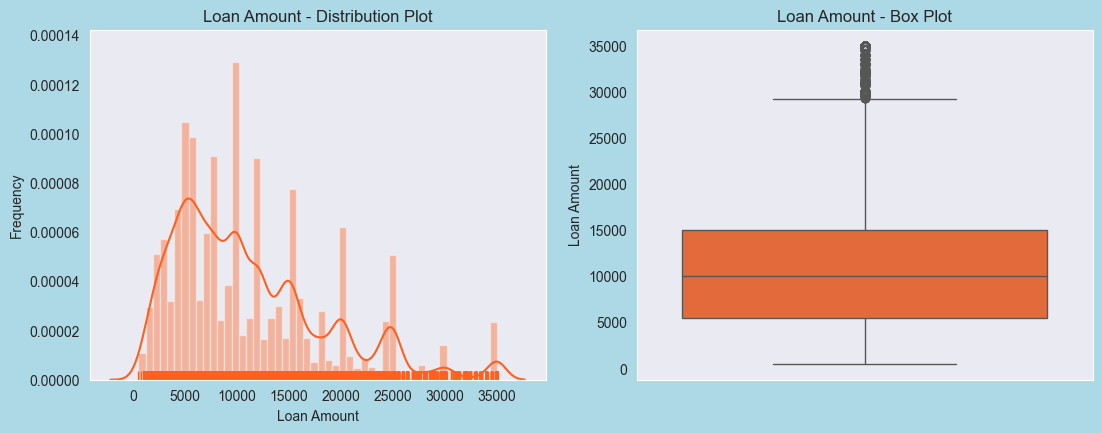

In [405]:
plt.figure(figsize=(20,10),facecolor='lightblue')
sns.set_style("dark")

plt.subplot(2, 3, 1)
ax = sns.distplot(loan_data_df['loan_amnt'],color='#FF5F1F',rug = True)
ax.set_title('Loan Amount - Distribution Plot')
ax.set_xlabel('Loan Amount')
ax.set_ylabel('Frequency')

plt.subplot(2, 3, 2)
box_plot = sns.boxplot(data=loan_data_df['loan_amnt'], color='#FF5F1F')
box_plot.set_title('Loan Amount - Box Plot')
box_plot.set(ylabel='Loan Amount')
plt.show()


In [406]:
loan_data_df.loan_amnt.describe()

count    36800.000000
mean     11149.540761
std       7369.855703
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [407]:
value_counts = loan_data_df.loan_amnt.value_counts()
(value_counts / len(loan_data_df)) * 100

loan_amnt
10000    7.255435
12000    5.918478
5000     5.190217
6000     4.907609
15000    4.804348
           ...   
3925     0.002717
11375    0.002717
18325    0.002717
9650     0.002717
23575    0.002717
Name: count, Length: 855, dtype: float64

### Findings

Based on the data and report, majority of people took loan of amount 10000 where is very few people took loan of amount 35000. Very few people took loans in less than 5000 range. Median of loan amount is 10000 and mean is 11149

***

#### <font color=pink> 2. Analysing loan terms </font>

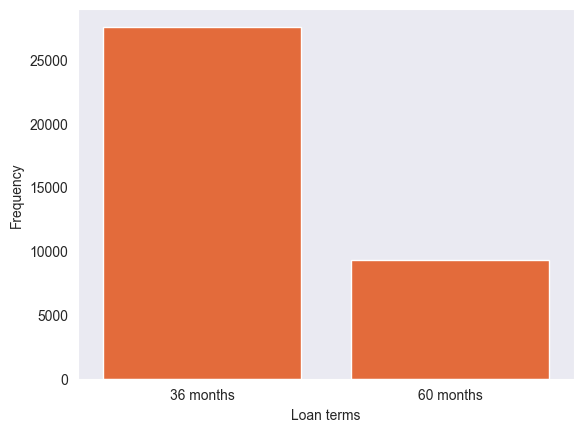

In [408]:
gm.renderBarPlot("term","Loan terms",'Frequency',0)

In [409]:
value_counts = loan_data_df.term.value_counts()
(value_counts / len(loan_data_df)) * 100

term
36 months    74.853261
60 months    25.146739
Name: count, dtype: float64

#### Findings

Approximately 75% of the loan borrowers chose a 36-month (3-year) loan term, while the remaining 25% opted for longer loan terms.

***

#### <font color=pink> 3. Analysing approved_loan_amnt_perctange column </font>

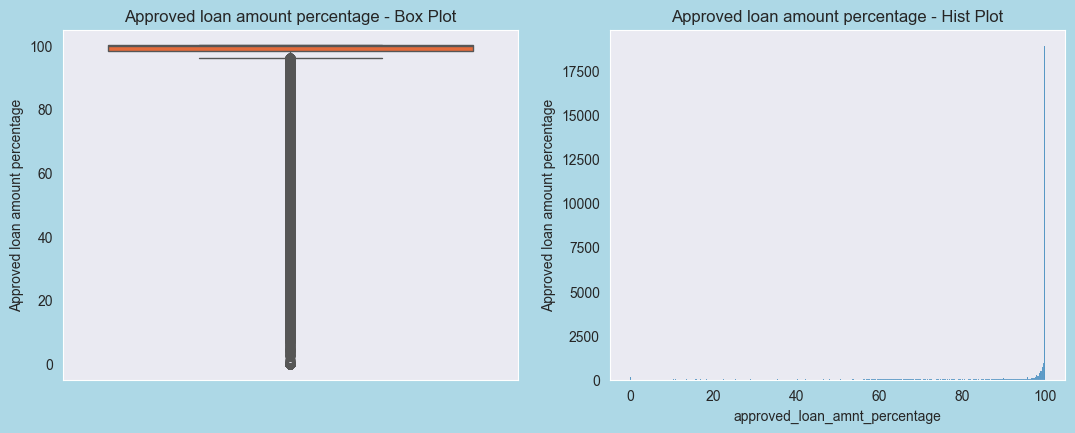

In [410]:
plt.figure(figsize=(20,10),facecolor='lightblue')
sns.set_style("dark")

plt.subplot(2, 3, 1)
box_plot = sns.boxplot(data=loan_data_df['approved_loan_amnt_percentage'], color='#FF5F1F')
box_plot.set_title('Approved loan amount percentage - Box Plot')
box_plot.set(ylabel='Approved loan amount percentage')

plt.subplot(2, 3, 2)
histPlot = sns.histplot(data=loan_data_df.approved_loan_amnt_percentage)
histPlot.set_title('Approved loan amount percentage - Hist Plot')
histPlot.set(ylabel='Approved loan amount percentage')
plt.show()

In [411]:
loan_data_df.approved_loan_amnt_percentage.describe()

count    36800.000000
mean        94.824049
std         15.016762
min          0.000000
25%         98.410000
50%         99.970000
75%        100.000000
max        100.000000
Name: approved_loan_amnt_percentage, dtype: float64

#### Findings

Over 75% of applications were approved for 100% funding, meaning that borrowers received the full loan amount they initially requested. This situation can have both positive and negative implications for the business, depending on the default rate, which we will analyze in detail later.

***

#### <font color=pink> 4. Analysing Interest rate </font>

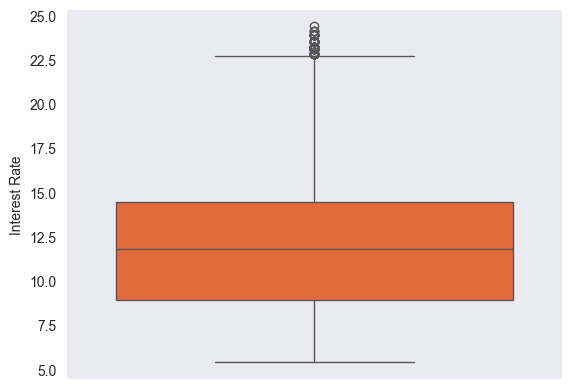

In [412]:
gm.renderBoxPlot("int_rate",'Interest Rate')

In [413]:
loan_data_df.int_rate.describe()

count    36800.000000
mean        11.983745
std          3.701182
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate, dtype: float64

#### Findings

Most of the loan interest rates are in the range of 9-14 percent, indicating a competitive and reasonable rate for the majority of borrowers. However, there are a few high-interest loans with rates between 22-25 percent.

***

#### <font color=pink> 5. Analysing Installments - Monthly payment done by the borrowers to lenders </font>

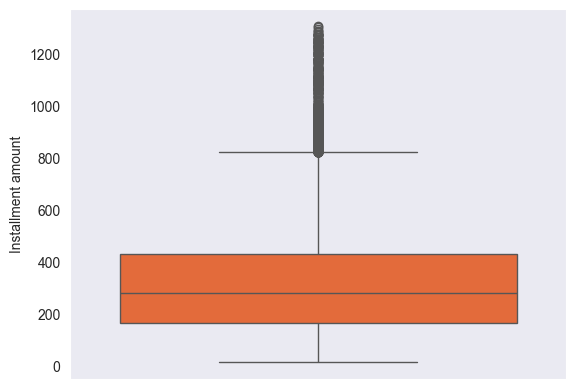

In [414]:
gm.renderBoxPlot('installment','Installment amount')

In [415]:
loan_data_df.installment.describe()

count    36800.000000
mean       324.906537
std        208.891979
min         16.080000
25%        167.730000
50%        280.110000
75%        429.365000
max       1305.190000
Name: installment, dtype: float64

#### Findings

The bulk of monthly installment amounts falls within the range of 168 to 429, with a median value of 280. However, there are instances of relatively higher monthly installments, reaching as high as 1305.

***

#### <font color=pink> 6. Analysing grade column </font>

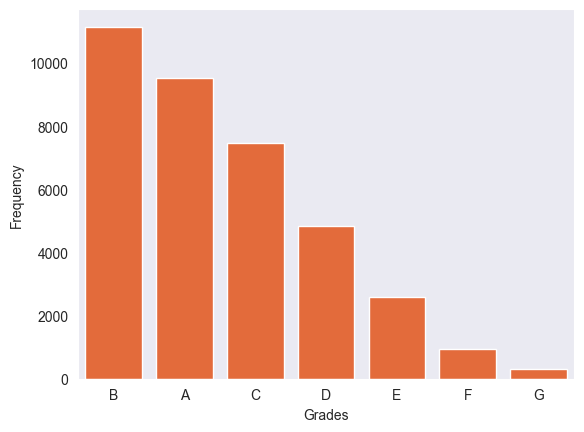

In [416]:
gm.renderBarPlot("grade","Grades",'Frequency',0)

In [417]:
value_counts = loan_data_df.grade.value_counts()
(value_counts / len(loan_data_df)) * 100

grade
B    30.296196
A    25.864130
C    20.309783
D    13.184783
E     6.994565
F     2.551630
G     0.798913
Name: count, dtype: float64

#### Findings

Most of the borrowers fall within the B and A grades, accounting for 30% and 26% respectively. This trend is positive for the lending club, indicating a substantial share of creditworthy borrowers.

***

#### <font color=pink> 7. Analysing employment experience </font>

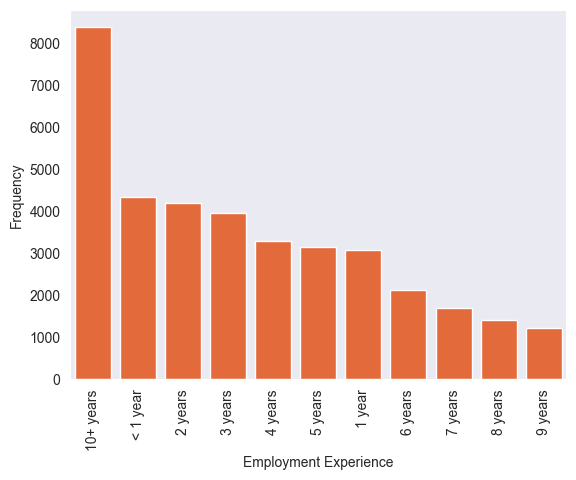

In [418]:
gm.renderBarPlot("emp_length","Employment Experience",'Frequency',90)

In [419]:
value_counts = loan_data_df.emp_length.value_counts()
(value_counts / len(loan_data_df)) * 100

emp_length
10+ years    22.739130
< 1 year     11.763587
2 years      11.418478
3 years      10.725543
4 years       8.940217
5 years       8.578804
1 year        8.345109
6 years       5.796196
7 years       4.581522
8 years       3.826087
9 years       3.285326
Name: count, dtype: float64

#### Findings

The majority of employees possess over 10+ years of experience, an ideal characteristic for any lending institution, as it suggests a mature and financially stable borrower base. However, the next highest number of loans is granted to individuals with less than 1 year of experience. This could pose a challenge, as they may be more susceptible to job instability, increasing the risk of loan defaults.

***

#### <font color=pink> 8. Analysing home ownership data </font>

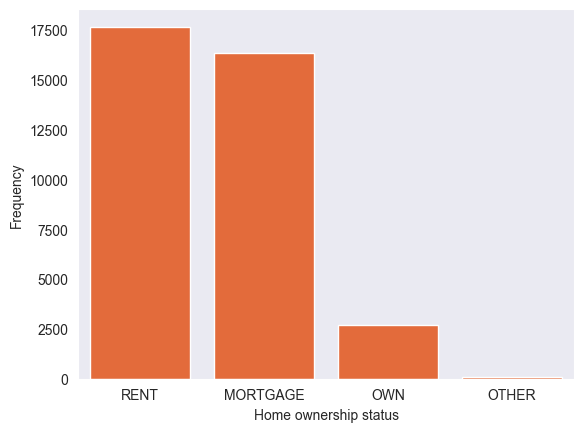

In [420]:
gm.renderBarPlot("home_ownership","Home ownership status",'Frequency',0)

In [421]:
value_counts = loan_data_df.home_ownership.value_counts()
(value_counts / len(loan_data_df)) * 100

home_ownership
RENT        48.008152
MORTGAGE    44.385870
OWN          7.345109
OTHER        0.260870
Name: count, dtype: float64

#### Findings

Nearly half (48%) of the borrowers have declared that they reside in rental properties, while a significant proportion, close to 45%, own homes with mortgages.

***

#### <font color=pink> 9. Analysing Annual Income - Income declared by the borrower during loan processing </font>

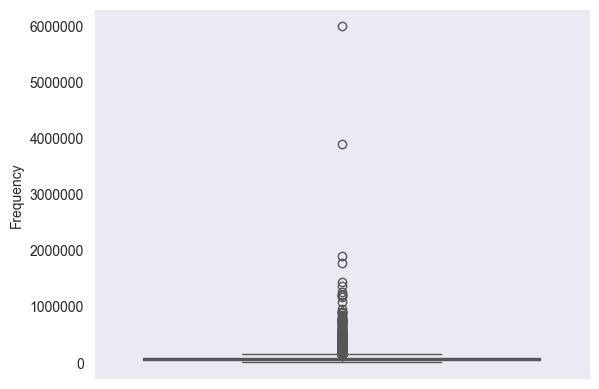

In [422]:
plt.ticklabel_format(style='plain', axis='y')
gm.renderBoxPlot('annual_inc','Frequency')

In [423]:
loan_data_df.annual_inc.describe()

count    3.680000e+04
mean     6.943448e+04
std      6.402159e+04
min      4.000000e+03
25%      4.113300e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

#### Findings

Most borrowers have reported annual incomes in the range of 40k to 200k. However, there are a few outliers with annual incomes exceeding 400k.

***

#### <font color=pink> 10. Analysing Verification Status</font>

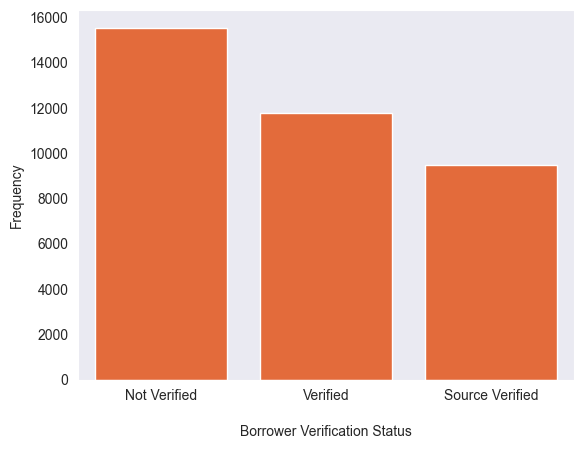

In [424]:
gm.renderBarPlot("verification_status","\nBorrower Verification Status",'Frequency',0)

In [425]:
value_counts = loan_data_df.verification_status.value_counts()
(value_counts / len(loan_data_df)) * 100

verification_status
Not Verified       42.266304
Verified           31.964674
Source Verified    25.769022
Name: count, dtype: float64

#### Findings

A red flag is raised as a substantial majority (42%) of loan applications or borrowers have unverified sources of income. This situation is not optimal for lenders and may result in a higher risk of defaults."

***

#### <font color=pink> 11. Analysing issue year, month and day of week </font>

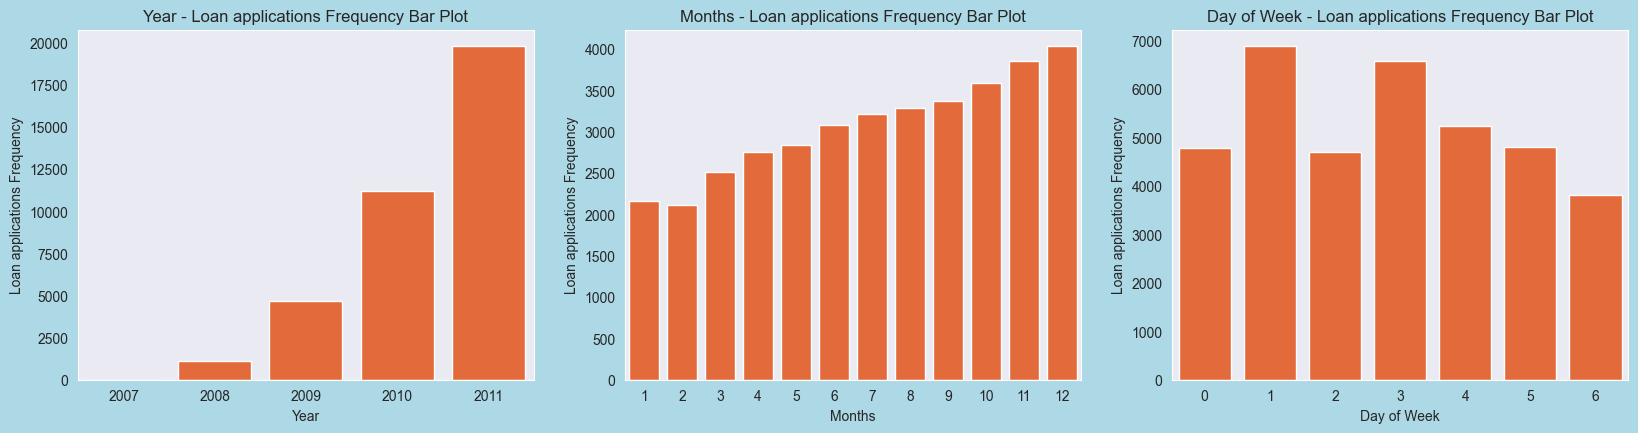

In [426]:
# Here I didnt renderBarPlot function becasue I wanted to show three charts together
plt.figure(figsize=(20,10),facecolor='lightblue')
sns.set_style("dark")

plt.subplot(2, 3, 1)
col_value_counts = loan_data_df['issue_d_year'].value_counts()
col_index = col_value_counts.index
bar_lot = sns.barplot(x=col_index, y=col_value_counts, color='#FF5F1F')
bar_lot.set(xlabel='Year')
bar_lot.set(ylabel='Loan applications Frequency')
bar_lot.set_title('Year - Loan applications Frequency Bar Plot')
plt.xticks(rotation=0)

plt.subplot(2, 3, 2)
col_value_counts = loan_data_df['issue_d_month'].value_counts()
col_index = col_value_counts.index
bar_lot = sns.barplot(x=col_index, y=col_value_counts, color='#FF5F1F')
bar_lot.set(xlabel='Months')
bar_lot.set(ylabel='Loan applications Frequency')
bar_lot.set_title('Months - Loan applications Frequency Bar Plot')
plt.xticks(rotation=0)

plt.subplot(2, 3, 3)
col_value_counts = loan_data_df['issue_d_dayofweek'].value_counts()
col_index = col_value_counts.index
bar_lot = sns.barplot(x=col_index, y=col_value_counts, color='#FF5F1F')
bar_lot.set(xlabel='Day of Week')
bar_lot.set(ylabel='Loan applications Frequency')
bar_lot.set_title('Day of Week - Loan applications Frequency Bar Plot')
plt.xticks(rotation=0)

plt.show()

### Findings

- From the year graph, it's evident that the distribution of loans is nearly doubling each year.
- Looking at the month graph, we can observe an increasing trend in loan requests from January to December. The majority of loan applications are concentrated in the last quarter of the year.
- Analyzing the day of the week graph, it becomes apparent that Mondays and Wednesdays are the busiest days of the week, surpassing the other days in terms of loan activity.

***

#### <font color=pink> 12. Analysing Loan Status column </font>

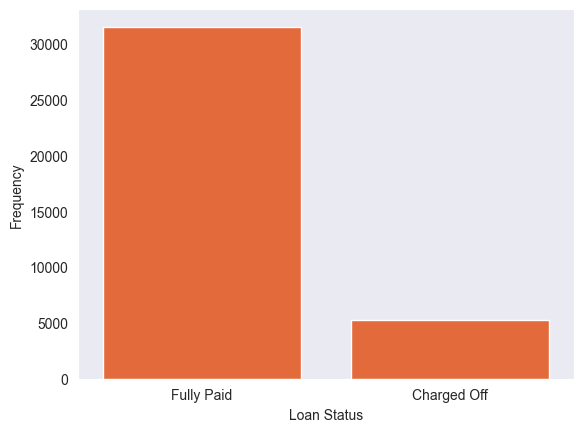

In [427]:
gm.renderBarPlot("loan_status","Loan Status",'Frequency',0)

In [428]:
value_counts = loan_data_df.loan_status.value_counts()
(value_counts / len(loan_data_df)) * 100

loan_status
Fully Paid     85.690217
Charged Off    14.309783
Name: count, dtype: float64

#### Findings

An encouraging sign is that 85% of the loans have been fully paid, while 15% of the loans have unfortunately ended in default.

***

#### <font color=pink> 13. Analysing Loan purpose </font>

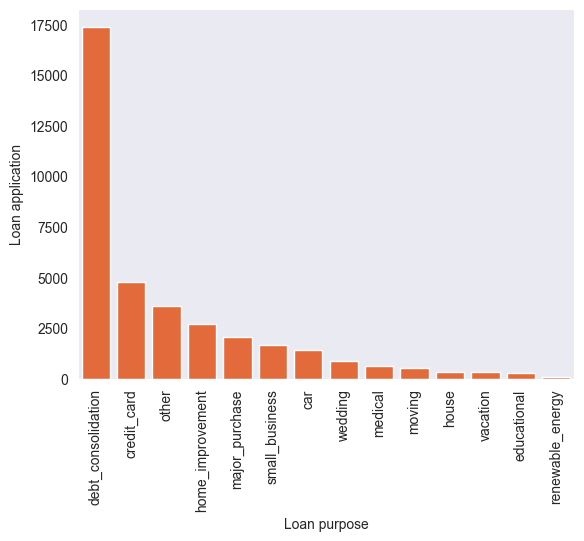

In [429]:
gm.renderBarPlot("purpose","Loan purpose",'Loan application',90)

In [430]:
value_counts = loan_data_df.purpose.value_counts()
(value_counts / len(loan_data_df)) * 100

purpose
debt_consolidation    47.209239
credit_card           13.040761
other                  9.769022
home_improvement       7.429348
major_purchase         5.584239
small_business         4.500000
car                    3.883152
wedding                2.426630
medical                1.752717
moving                 1.470109
house                  0.948370
vacation               0.926630
educational            0.804348
renewable_energy       0.255435
Name: count, dtype: float64

#### Findings

Debt consolidations account for 47% of loan purposes, indicating the combination of multiple loans into a single account. Credit card loans make up the second largest category at 13% of all loan accounts. Conversely, renewable energy loan accounts represent the smallest portion.

***

#### <font color=pink> 14. Analysing Address State column </font>

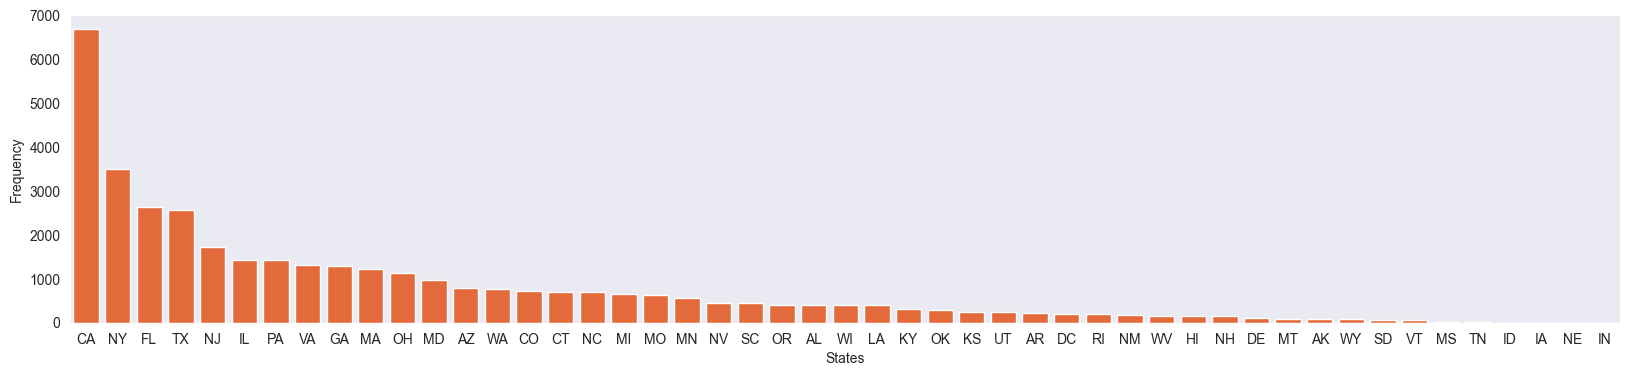

In [431]:
plt.figure(figsize=(20,4))
gm.renderBarPlot("addr_state","States",'Frequency',0)

In [432]:
value_counts = loan_data_df.addr_state.value_counts()
(value_counts / len(loan_data_df)) * 100

addr_state
CA    18.146739
NY     9.540761
FL     7.176630
TX     6.942935
NJ     4.701087
IL     3.883152
PA     3.869565
VA     3.548913
GA     3.516304
MA     3.339674
OH     3.059783
MD     2.657609
AZ     2.149457
WA     2.065217
CO     1.959239
CT     1.894022
NC     1.885870
MI     1.798913
MO     1.736413
MN     1.559783
NV     1.250000
SC     1.203804
OR     1.125000
AL     1.114130
WI     1.108696
LA     1.108696
KY     0.828804
OK     0.763587
KS     0.654891
UT     0.654891
AR     0.605978
DC     0.559783
RI     0.516304
NM     0.470109
WV     0.445652
HI     0.434783
NH     0.418478
DE     0.290761
MT     0.209239
AK     0.203804
WY     0.203804
SD     0.160326
VT     0.138587
MS     0.051630
TN     0.027174
ID     0.010870
IA     0.002717
NE     0.002717
IN     0.002717
Name: count, dtype: float64

#### Findings

Approximately 18% of loan applicants originate from California, with nearly 10% hailing from New York. The state of Indiana, on the other hand, has the lowest number of applicants.

***

#### <font color=pink> 15. Analysing DTI - Debt to income ratio </font>

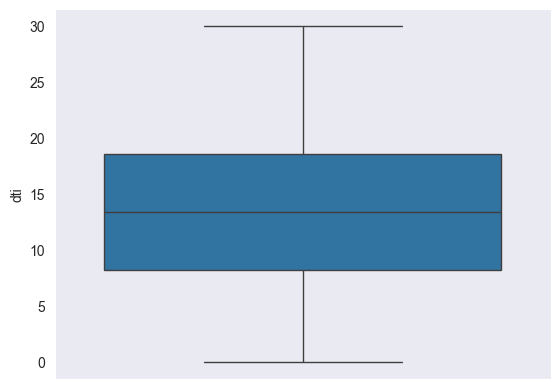

In [433]:
sns.boxplot(loan_data_df.dti)
plt.show()

#### Findings

Typically, a preferred debt-to-income ratio (DTI) is below 36%. In our dataset, we observe DTI values at or below 30%, which is favorable for lenders when considering lending money to borrowers.

***

#### <font color=pink> 16. Analysing earliest credit line column</font>

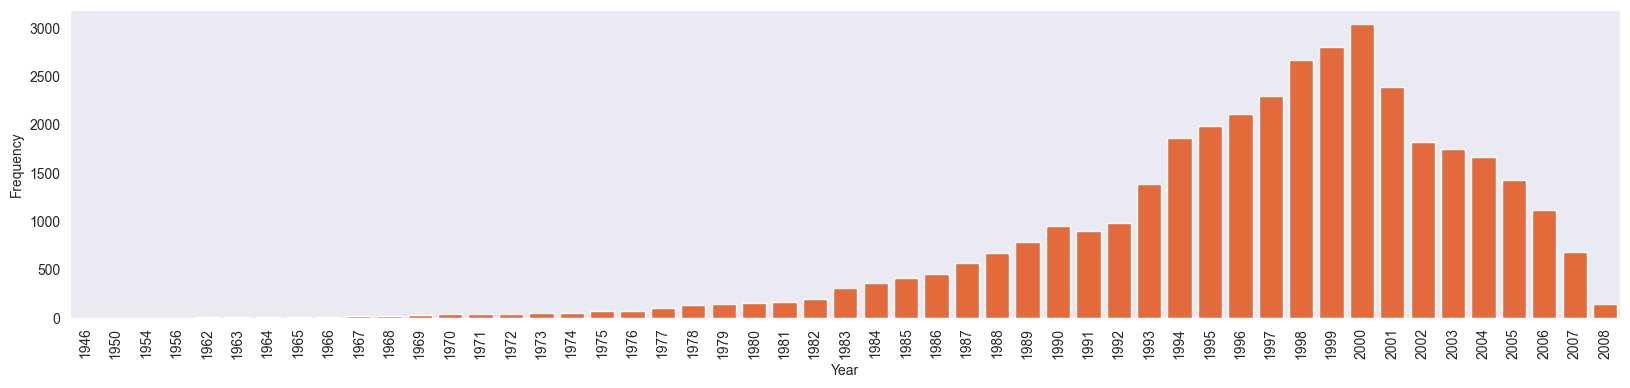

In [434]:
plt.figure(figsize=(20,4))
gm.renderBarPlot("earliest_cr_year","Year",'Frequency',90)

In [435]:
value_counts = loan_data_df.earliest_cr_year.value_counts()
(value_counts / len(loan_data_df)) * 100

earliest_cr_year
2000    8.250000
1999    7.622283
1998    7.250000
2001    6.480978
1997    6.228261
1996    5.741848
1995    5.394022
1994    5.059783
2002    4.929348
2003    4.755435
2004    4.532609
2005    3.872283
1993    3.769022
2006    3.029891
1992    2.652174
1990    2.576087
1991    2.429348
1989    2.138587
2007    1.839674
1988    1.820652
1987    1.535326
1986    1.217391
1985    1.105978
1984    0.989130
1983    0.823370
1982    0.527174
1981    0.434783
1980    0.426630
2008    0.391304
1979    0.372283
1978    0.369565
1977    0.266304
1976    0.201087
1975    0.179348
1974    0.144022
1973    0.122283
1971    0.103261
1970    0.100543
1972    0.092391
1969    0.070652
1967    0.040761
1968    0.038043
1966    0.021739
1965    0.016304
1963    0.010870
1962    0.008152
1964    0.008152
1956    0.002717
1946    0.002717
1950    0.002717
1954    0.002717
Name: count, dtype: float64

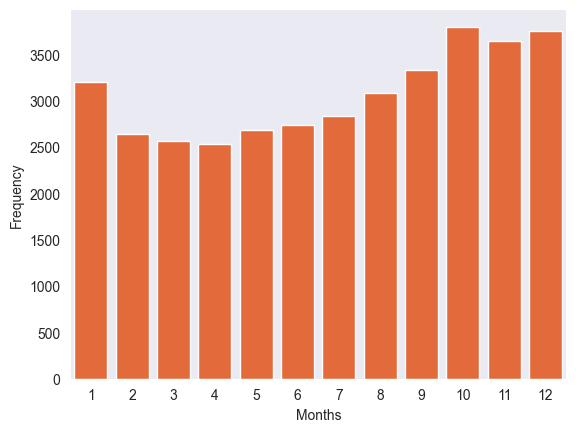

In [436]:
gm.renderBarPlot("earliest_cr_month","Months",'Frequency',0)

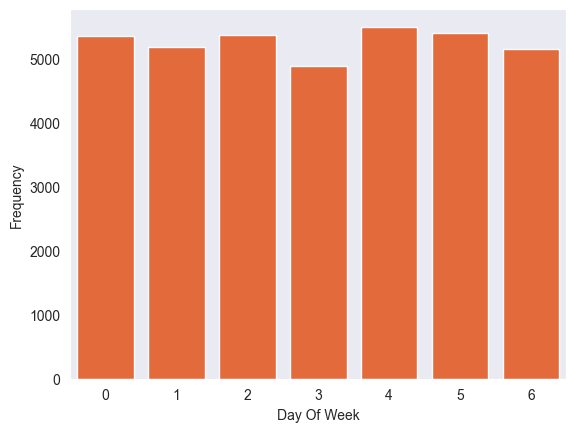

In [437]:
gm.renderBarPlot("earliest_cr_dayofweek","Day Of Week",'Frequency',0)

#### Findings

Most (8.25%) of the loan credit line is disbursed in the year 2000, and the highest utilization occurs during the last quarter of that year.

***

#### <font color=pink> 17. Analysing public derogatory record fields</font>

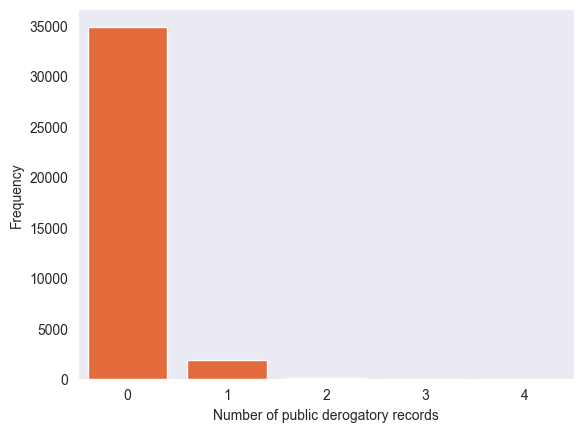

In [438]:
gm.renderBarPlot("pub_rec","Number of public derogatory records",'Frequency',0)

In [439]:
value_counts = loan_data_df.pub_rec.value_counts()
(value_counts / len(loan_data_df)) * 100

pub_rec
0    94.758152
1     5.095109
2     0.122283
3     0.019022
4     0.005435
Name: count, dtype: float64

#### Findings

Majority ( ~95% ) of the borrowers do not have public derogatory records which is a great sign for lenders club.

***

#### <font color=pink> 18. Analysing public record for bankrupties </font>

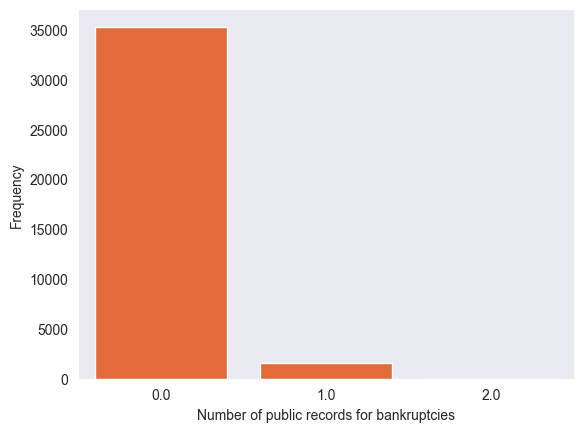

In [440]:
gm.renderBarPlot("pub_rec_bankruptcies","Number of public records for bankruptcies",'Frequency',0)

In [441]:
value_counts = loan_data_df.pub_rec_bankruptcies.value_counts()
(value_counts / len(loan_data_df)) * 100

pub_rec_bankruptcies
0.0    95.831522
1.0     4.154891
2.0     0.013587
Name: count, dtype: float64

#### Findings

The vast majority, approximately 96%, of borrowers have not declared bankruptcy. This is a positive and reassuring sign for the lenders' club.

***

## <font color=yellow> Segmented Univariate Analysis </font>

In this part, we'll take a closer look at the information by grouping it into different categories and then comparing those categories using summary values. We'll mostly use a type of graph called a boxplot for our analysis.

Let's start by looking at the loan amount and loan term fields together to understand how they are related.

Let's create functions to draw our boxplots

In [442]:
def createSegmentedBoxPlot(x,y,data,order=None):
        sns.boxplot(x=x,y=y,order=order,data=data)
        plt.show()

In [443]:
def createSegmentedBarPlot(x,y,hue,data):
    sns.barplot(x=x,y=y,hue=hue,data=data)
    plt.show()

***

### 1. Let's analyze Terms and Loan Amount fields together and figure out the relation between them.

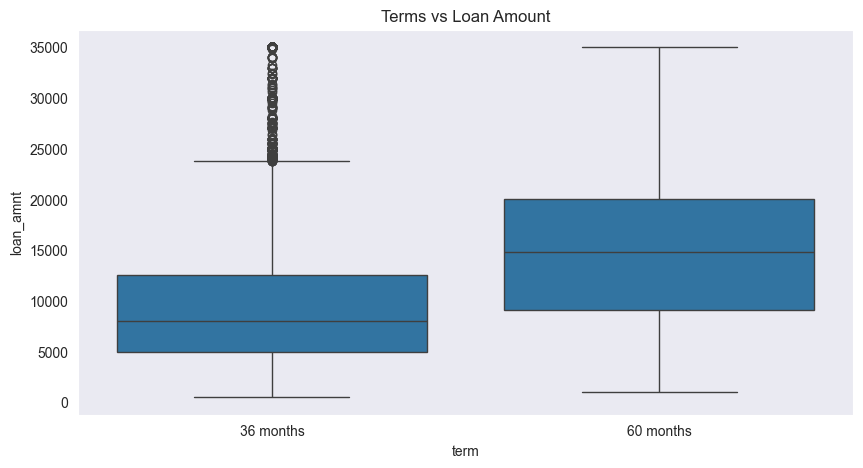

In [444]:
plt.figure(figsize=(10,5))
plt.title('Terms vs Loan Amount')
createSegmentedBoxPlot('term',loan_data_df.loan_amnt,data=loan_data_df)

People who borrow money for longer periods often request larger loan amounts. The median loan amount for borrowers with 36 and 60 months of loan tenure is about twice as much.

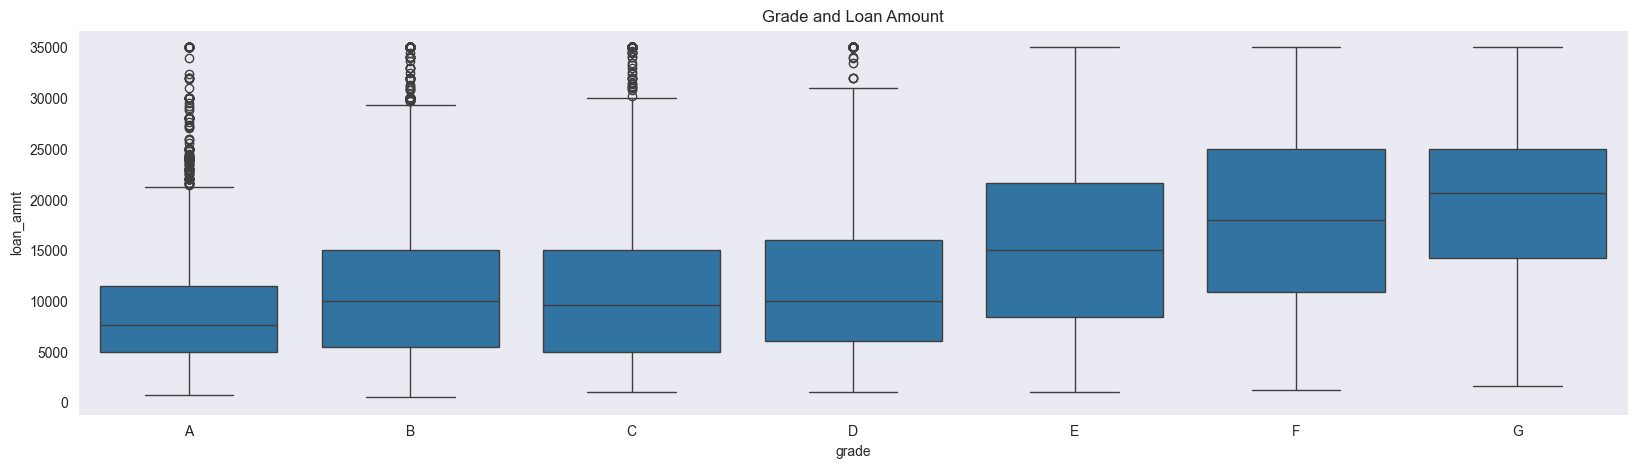

In [445]:
grade_ord = loan_data_df.grade.unique()
grade_ord.sort()
plt.figure(figsize=(20,5))
plt.title('Grade and Loan Amount')
createSegmentedBoxPlot('grade',loan_data_df.loan_amnt,data=loan_data_df,order=grade_ord)

Borrowers with lower grade especially after C are taking more loan than borrowers with good ranking such as A and B. There is definately a trend where as the grades are decreasing, loan amount is increasing.

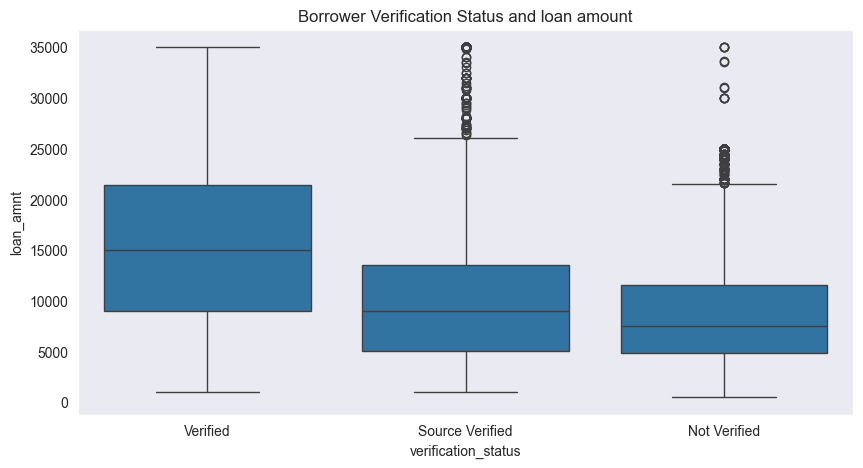

In [446]:
plt.figure(figsize=(10,5))
plt.title('Borrower Verification Status and loan amount')
createSegmentedBoxPlot('verification_status',loan_data_df.loan_amnt,data=loan_data_df)

For loan amount exceeding 9000, all borrowers are verified (combining verified and source verified together). This means higher loan amount are only given to borrowers with proper verification of income and assets.

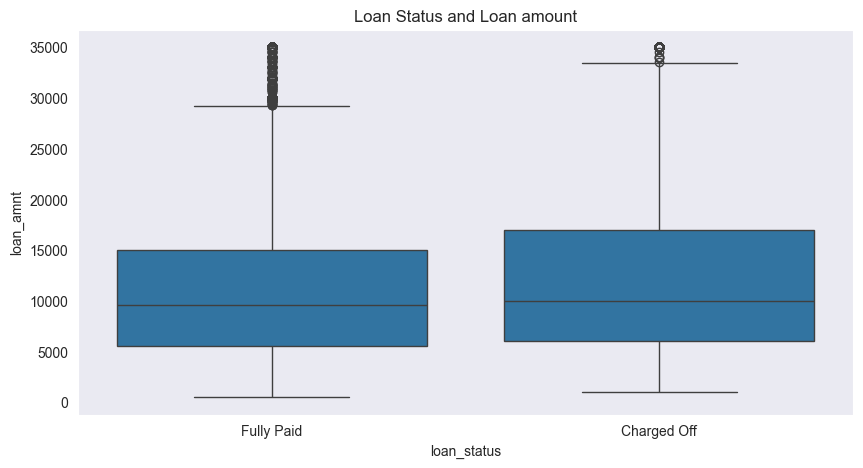

In [447]:
plt.figure(figsize=(10,5))
plt.title('Loan Status and Loan amount')
createSegmentedBoxPlot('loan_status',loan_data_df.loan_amnt,data=loan_data_df)

Loans that were charged off, meaning they weren't repaid, had larger amounts compared to loans that were fully paid. This suggests that taking out bigger loans might increase the risk of not being able to pay them back.

***

### 2. Let's analyze funded amount and loan term fields together and figure out the relation between them.

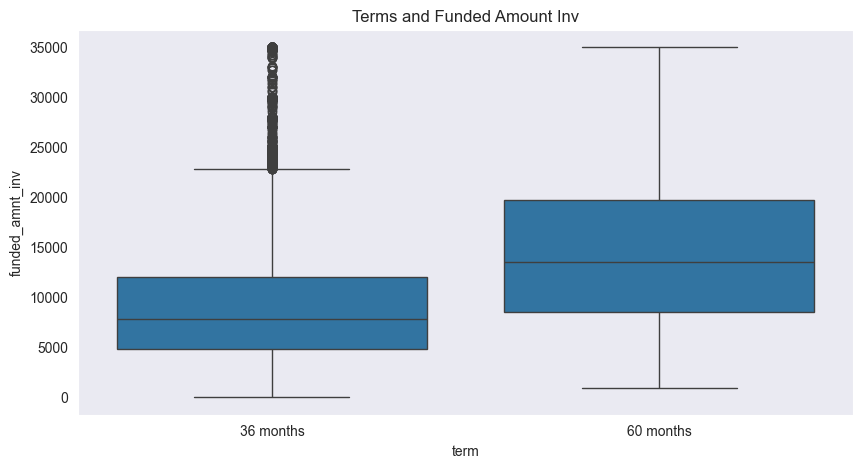

In [448]:
plt.figure(figsize=(10,5))
plt.title('Terms and Funded Amount Inv')
createSegmentedBoxPlot('term',loan_data_df.funded_amnt_inv,data=loan_data_df)

Most of the loans that ended up not getting repaid were funded initially.

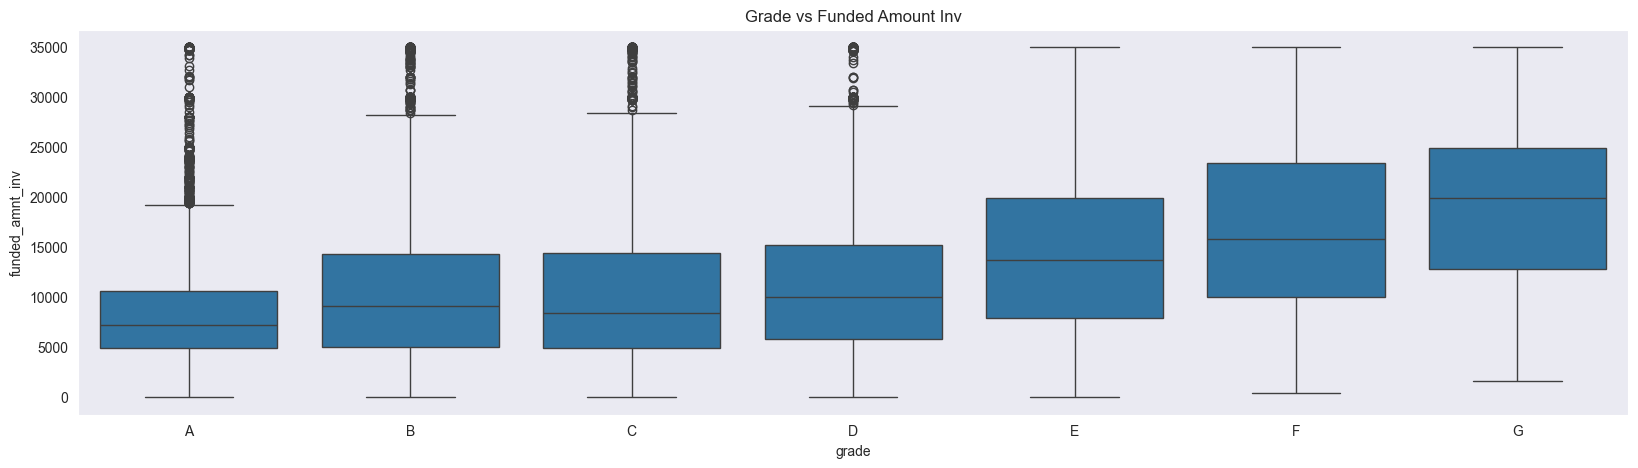

In [449]:
grade_ord = loan_data_df.grade.unique()
grade_ord.sort()
plt.figure(figsize=(20,5))
plt.title('Grade vs Funded Amount Inv')
createSegmentedBoxPlot('grade',loan_data_df.funded_amnt_inv,data=loan_data_df,order=grade_ord)

More people with lower grades are getting bigger loans compared to those with better grades. This might not be good when it comes to people not repaying their loans, but it can be good for the lending company's profits because they charge higher interest rates to lower-graded customers.

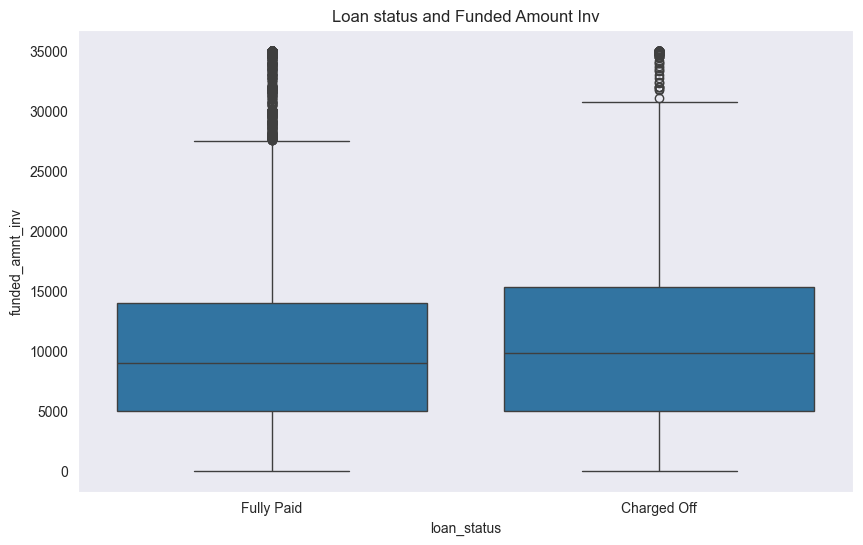

In [450]:
plt.figure(figsize=(10,6))
plt.title('Loan status and Funded Amount Inv')
createSegmentedBoxPlot('loan_status',loan_data_df.funded_amnt_inv,data=loan_data_df)

The median values for loans that weren't paid back and those that were fully paid are pretty much the same. This isn't a big problem because the number of loans that weren't paid back, while still high, is not as high as the number of fully paid loans.

***

### 3. Let's analyze interest rates and loan term fields together and figure out the relation between them.

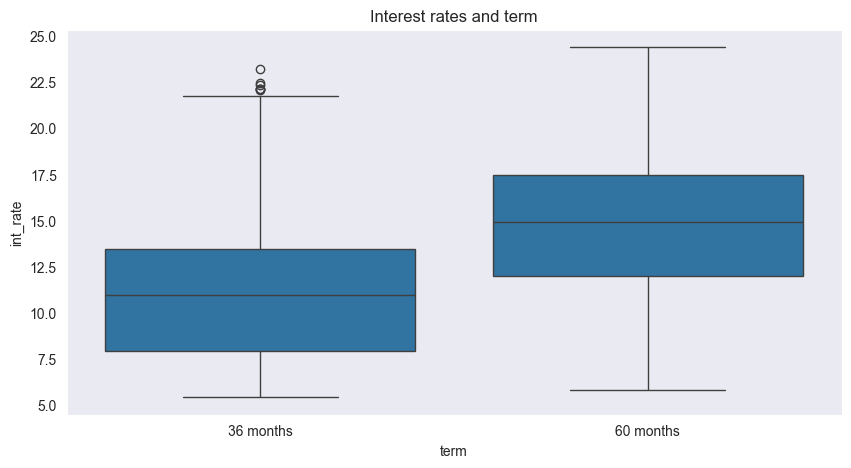

In [451]:
plt.figure(figsize=(10,5))
plt.title('Interest rates and term')
createSegmentedBoxPlot('term',loan_data_df.int_rate,data=loan_data_df)

Higher term or tenure loans have higher interest rates.

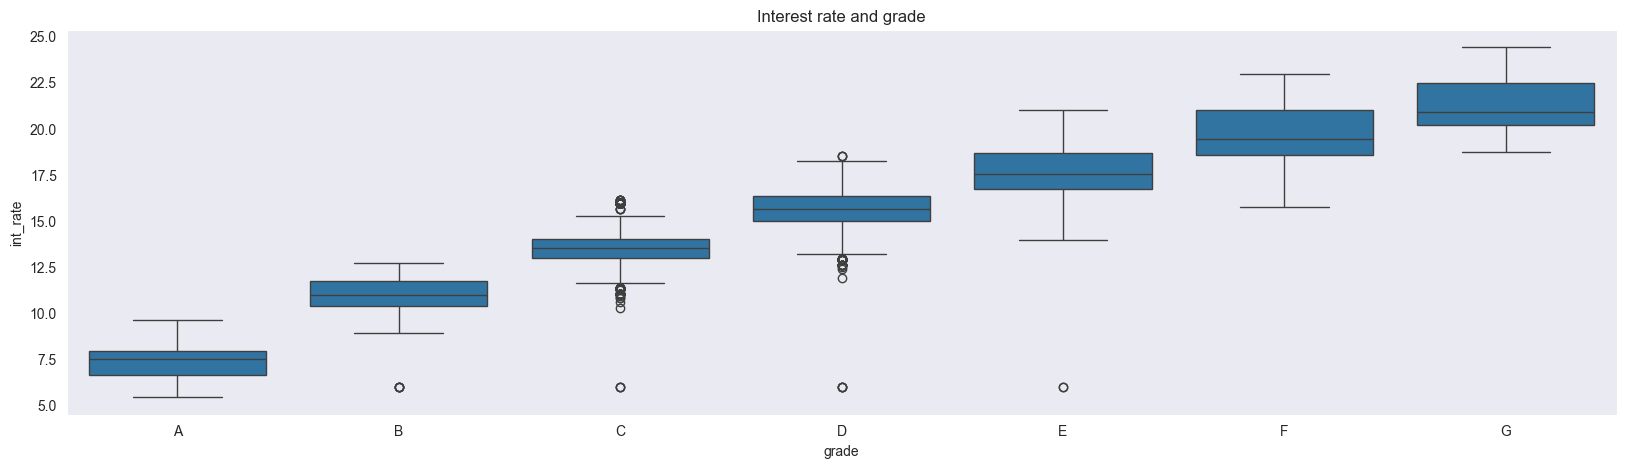

In [452]:
plt.figure(figsize=(20,5))
grade_ord = loan_data_df.grade.unique()
grade_ord.sort()
plt.title('Interest rate and grade')
createSegmentedBoxPlot('grade',loan_data_df.int_rate,data=loan_data_df,order=grade_ord)

As mentioned earlier, as the grades are lowering, interest rates are rising for such borrowers. This does ensure profit but increases the chance of getting default as we also observerd the majority bunch of defaulted borrowers are from high interest rate category.

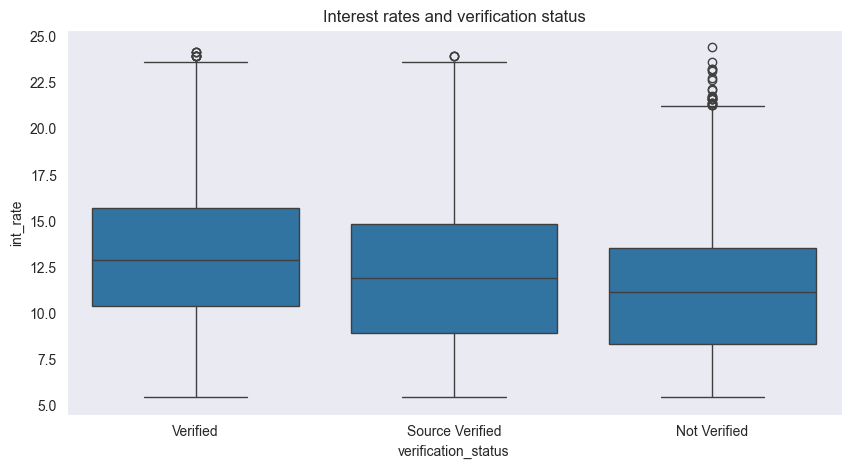

In [453]:
plt.figure(figsize=(10,5))
plt.title('Interest rates and verification status')
createSegmentedBoxPlot('verification_status',loan_data_df.int_rate,data=loan_data_df)

Borrowers who are not verified got lower interest rates on loans vs borrowers with verified source. This is not right and lenders club needs to correct it.

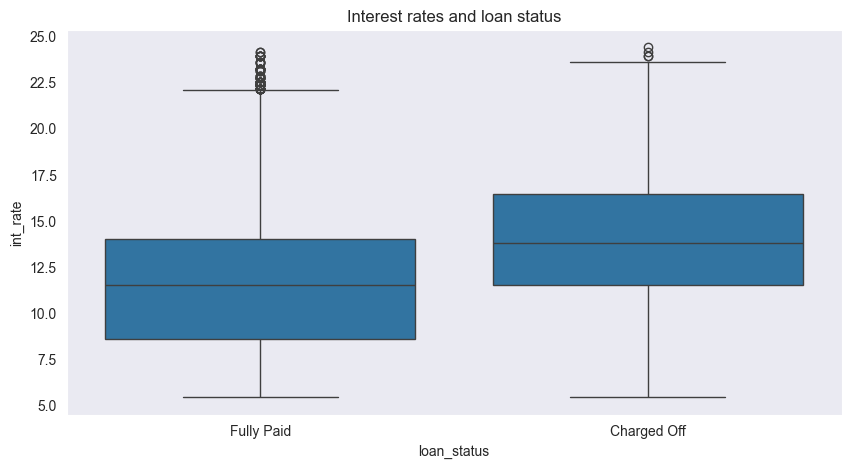

In [454]:
plt.figure(figsize=(10,5))
plt.title('Interest rates and loan status')
createSegmentedBoxPlot('loan_status',loan_data_df.int_rate,data=loan_data_df)

Like I mentioned earlier, higher interest rates leads to more default.

***

### 4. Let's analyze DTI (Debt to income ration) and loan term fields together and figure out the relation between them.

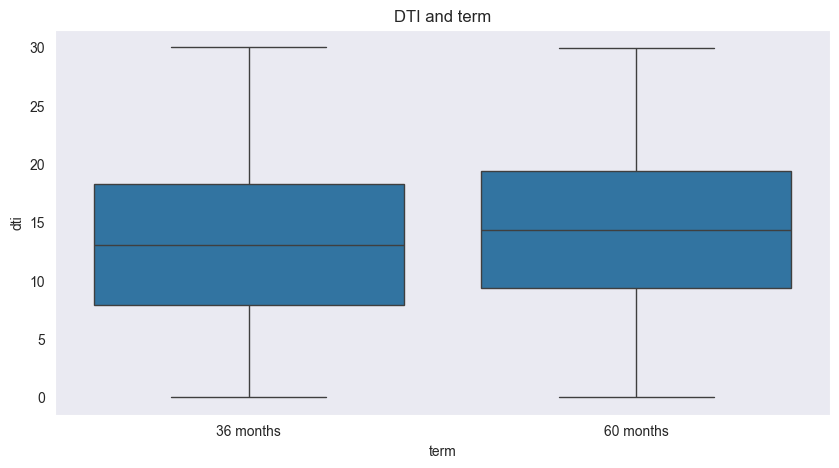

In [455]:
plt.figure(figsize=(10,5))
plt.title('DTI and term')
createSegmentedBoxPlot('term',loan_data_df.dti,data=loan_data_df)

Borrowers with higher tenure rate have high debt to income ratio i.e their debt is higher than their income.

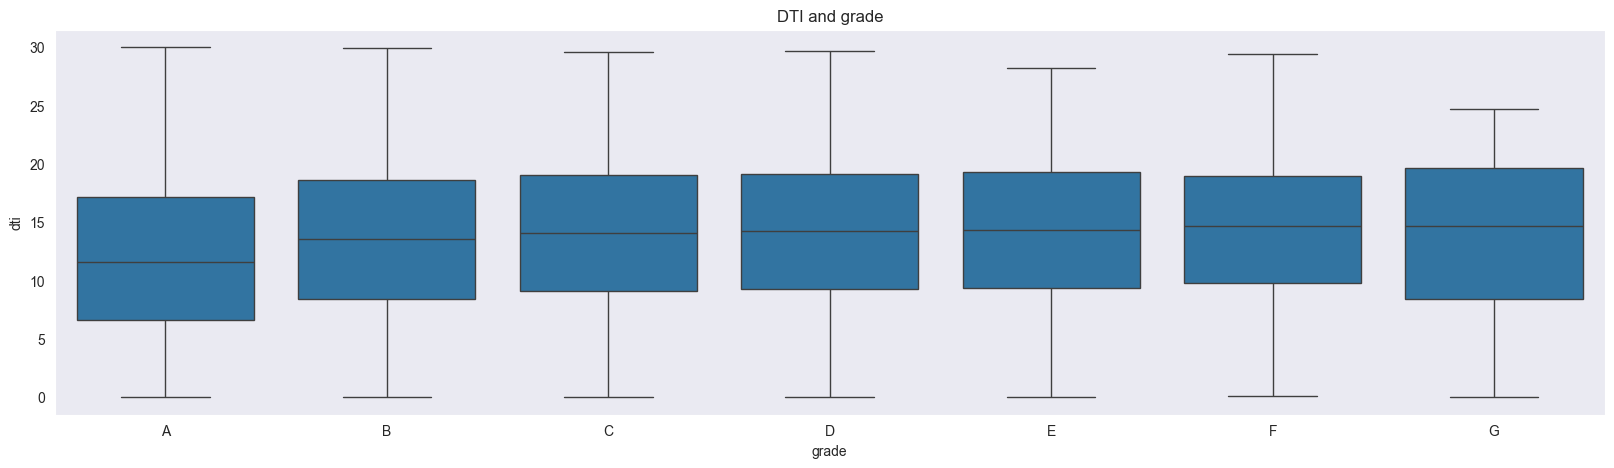

In [456]:
plt.figure(figsize=(20,5))
grade_ord = loan_data_df.grade.unique()
grade_ord.sort()
plt.title('DTI and grade')
createSegmentedBoxPlot('grade',loan_data_df.dti,data=loan_data_df,order=grade_ord)

Other than borrowers in A category, DTI is bit higher but not exceeding 30. This is not a bad sign however a lower DTI should be opted for good repayment possibility. Let's validate this in the next chart.

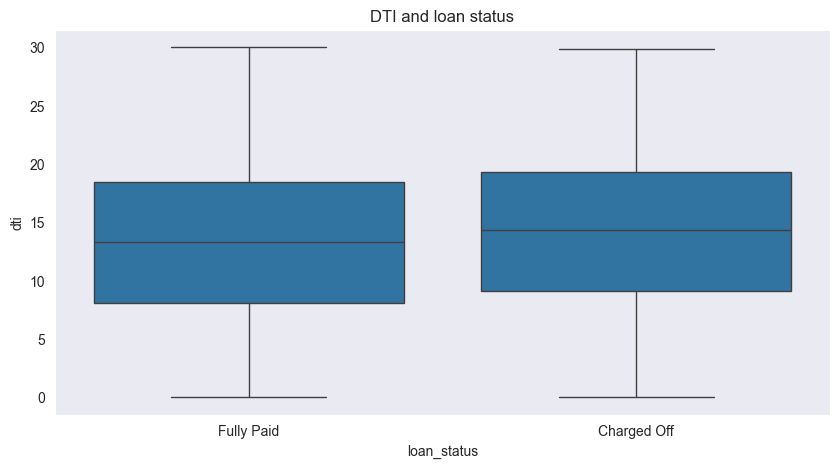

In [457]:
plt.figure(figsize=(10,5))
plt.title('DTI and loan status')
createSegmentedBoxPlot('loan_status',loan_data_df.dti,data=loan_data_df)

Borrowers with higher DTI are more prone to getting default. This indicates that DTI is one of the key factor in deciding loan application.

***

### 5. Let's analyze with public derogatory record with respect to loan term and understand the relationship of data.

In [458]:
pub_rec_data = loan_data_df.groupby(['pub_rec','term'],as_index=False)['id'].count()

In [459]:
sum_pub_rec_data = pub_rec_data.groupby('pub_rec')['id'].transform('sum')
pub_rec_data['percentage'] = pub_rec_data['id'] / sum_pub_rec_data * 100
pub_rec_data

,pub_rec,term,id,percentage
0,0,36 months,26152,74.996415
1,0,60 months,8719,25.003585
2,1,36 months,1349,71.946667
3,1,60 months,526,28.053333
4,2,36 months,36,80.000000
5,2,60 months,9,20.000000
6,3,36 months,7,100.000000
7,4,36 months,2,100.000000


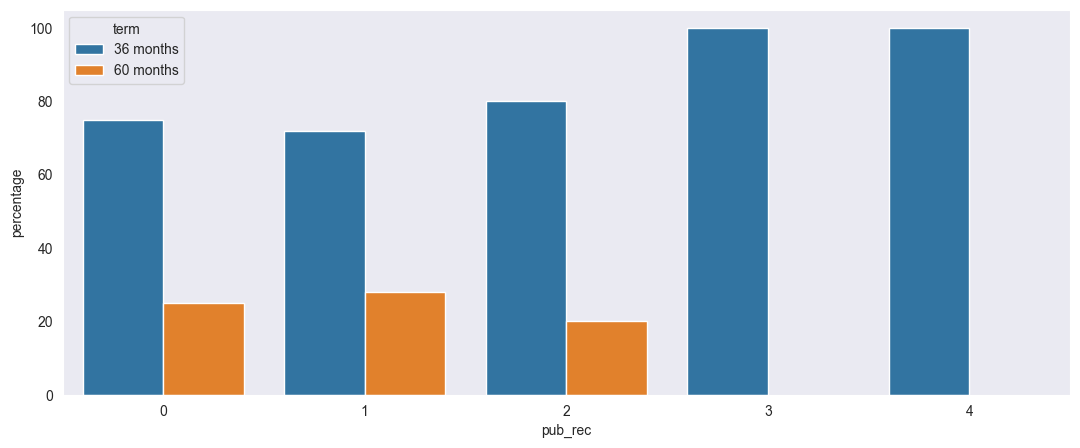

In [460]:
plt.figure(figsize=(13,5))
createSegmentedBarPlot('pub_rec','percentage','term',pub_rec_data)

After calculating a percentage and plotting a bar we can see borrowers with maximum public derogatory records took loans for 36 months term (in bar 3 and 4 respectively). Similarly we can check the grades along with public derogatory records and figure out the relationship.

In [461]:
pub_rec_data = loan_data_df.groupby(['pub_rec','grade'],as_index=False)['id'].count()

In [462]:
sum_pub_rec_data = pub_rec_data.groupby('pub_rec')['id'].transform('sum')
pub_rec_data['percentage'] = pub_rec_data['id'] / sum_pub_rec_data * 100
pub_rec_data

,pub_rec,grade,id,percentage
0,0,A,9384,26.910613
1,0,B,10561,30.285911
2,0,C,6925,19.858909
3,0,D,4497,12.896103
4,0,E,2378,6.819420
5,0,F,856,2.454762
6,0,G,270,0.774282
7,1,A,132,7.040000
8,1,B,576,30.720000
9,1,C,529,28.213333


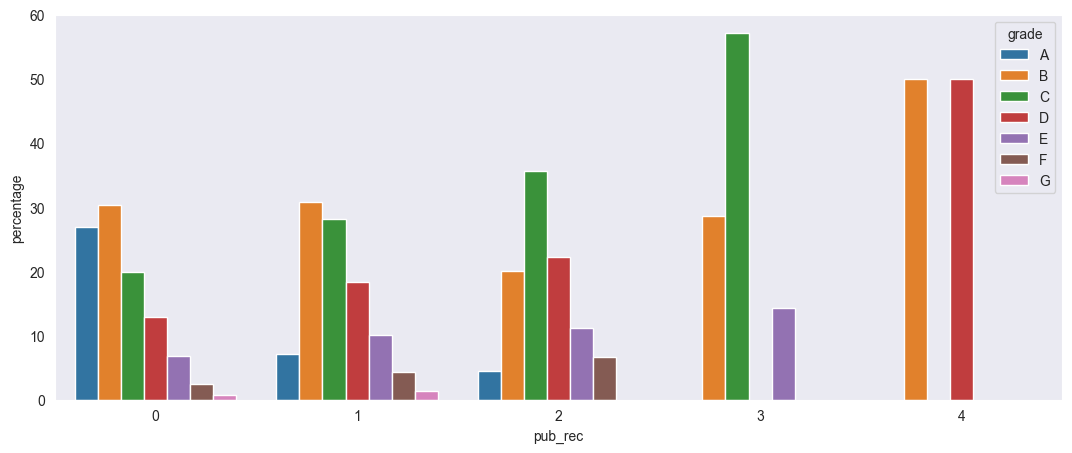

In [463]:
plt.figure(figsize=(13,5))
createSegmentedBarPlot('pub_rec','percentage','grade',pub_rec_data)

Borrowers with A grade belong to low public derogatory record while grades B,C,and D belongs to highest public derogatory records.

***

### 6. Let's evaluate more and see how it impacts the loan status.

In [464]:
pub_rec_data = loan_data_df.groupby(['pub_rec','loan_status'],as_index=False)['id'].count()
pub_rec_data

,pub_rec,loan_status,id
0,0,Charged Off,4838
1,0,Fully Paid,30033
2,1,Charged Off,418
3,1,Fully Paid,1457
4,2,Charged Off,10
5,2,Fully Paid,35
6,3,Fully Paid,7
7,4,Fully Paid,2


In [465]:
sum_pub_rec_data = pub_rec_data.groupby('pub_rec')['id'].transform('sum')
pub_rec_data['percentage'] = pub_rec_data['id'] / sum_pub_rec_data * 100
pub_rec_data

,pub_rec,loan_status,id,percentage
0,0,Charged Off,4838,13.873993
1,0,Fully Paid,30033,86.126007
2,1,Charged Off,418,22.293333
3,1,Fully Paid,1457,77.706667
4,2,Charged Off,10,22.222222
5,2,Fully Paid,35,77.777778
6,3,Fully Paid,7,100.000000
7,4,Fully Paid,2,100.000000


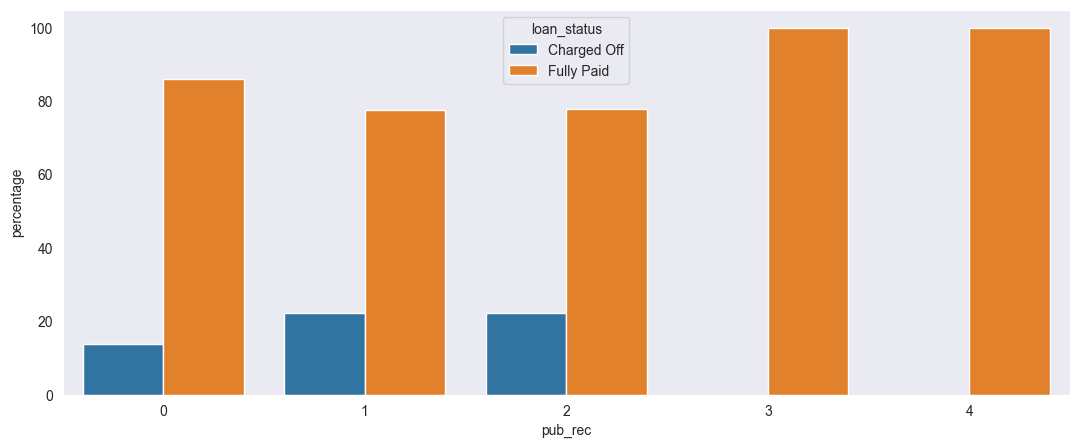

In [466]:
plt.figure(figsize=(13,5))
createSegmentedBarPlot('pub_rec','percentage','loan_status',pub_rec_data)

Interesting! There is an increase in default for people with public derogatory records but then the data is missing for higher derogatory records especailly in 3 and 4. This occurs because very few people with higher public derogatory records got loans with some exception of course.

## <font color=yellow> Bivariate Analysis </font>

#### 1. Let's analyze the term with the loan status

In [467]:
loan_bivariate_term_data = loan_data_df.groupby(['term','loan_status'],as_index=False)['id'].count()
loan_bivariate_term_data

,term,loan_status,id
0,36 months,Charged Off,2943
1,36 months,Fully Paid,24603
2,60 months,Charged Off,2323
3,60 months,Fully Paid,6931


In [468]:
sum_loan_bivariate_term_data = loan_bivariate_term_data.groupby('term')['id'].transform('sum')
loan_bivariate_term_data['percentage'] = loan_bivariate_term_data['id'] / sum_loan_bivariate_term_data * 100
loan_bivariate_term_data

,term,loan_status,id,percentage
0,36 months,Charged Off,2943,10.683947
1,36 months,Fully Paid,24603,89.316053
2,60 months,Charged Off,2323,25.102658
3,60 months,Fully Paid,6931,74.897342


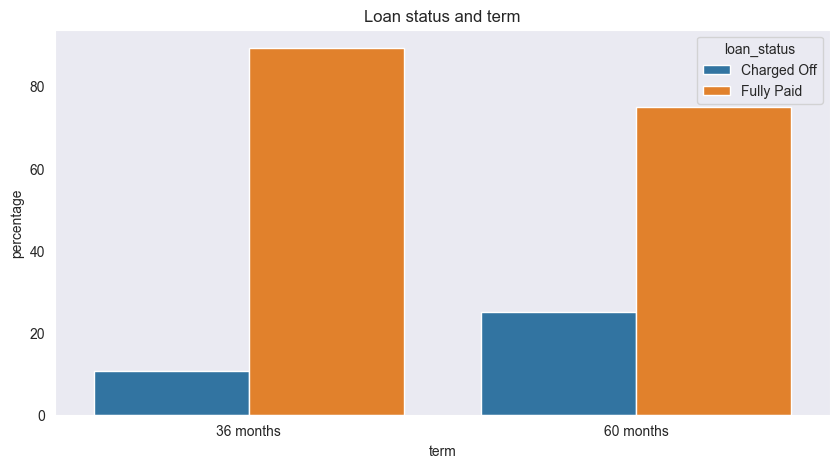

In [469]:
plt.figure(figsize=(10,5))
plt.title("Loan status and term")
createSegmentedBarPlot('term','percentage','loan_status',loan_bivariate_term_data)

There are more defaulted borrowers in the 60 months tenure or term than in 36 months term. This indicates that longer loan duration also results in the default.

***

#### 2. Let's analyze the same with the loan amount

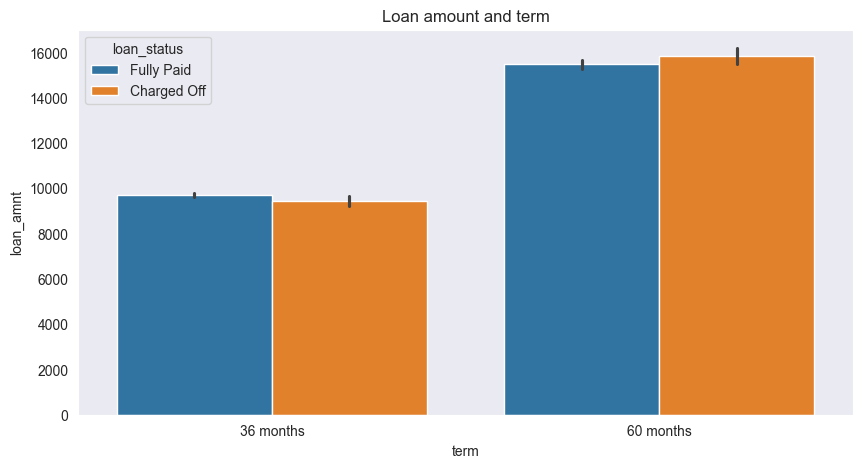

In [470]:
plt.figure(figsize=(10,5))
plt.title("Loan amount and term")
createSegmentedBarPlot('term','loan_amnt','loan_status',loan_data_df)

Loan amount seems to not an indicator for a defaulted loans as there are almost equal numbers of borrowers who fully paid loans and who got defaulted.

***

#### 3. Let's see if interest rates affects the default rate.

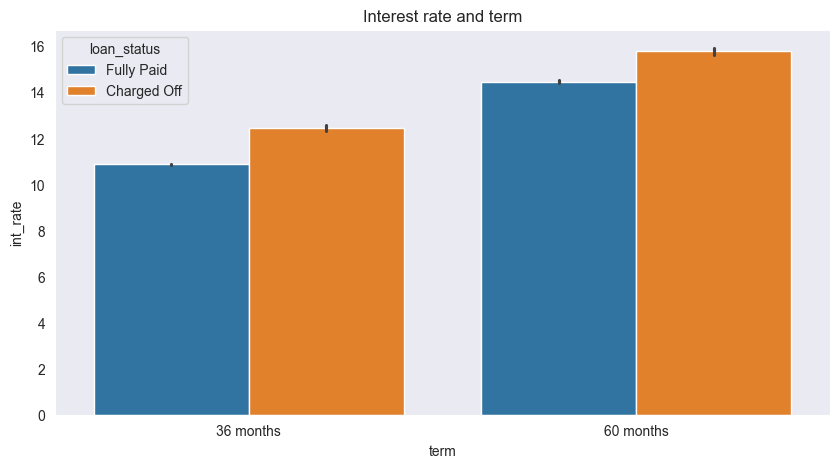

In [471]:
plt.figure(figsize=(10,5))
plt.title("Interest rate and term")
createSegmentedBarPlot('term','int_rate','loan_status',loan_data_df)

As guessed, higher interest rates leads to more default loans irrespective of terms. The interesting thing is that difference between interest rates of borrowrs who fully paid thier loans vs people who got defaulted is not that high. This gives an indication that adjusting an interest rate may leads to more fully paid loan than defaulted loans.

***

#### 4. Let's see if debt to income ration impacts the default rate.

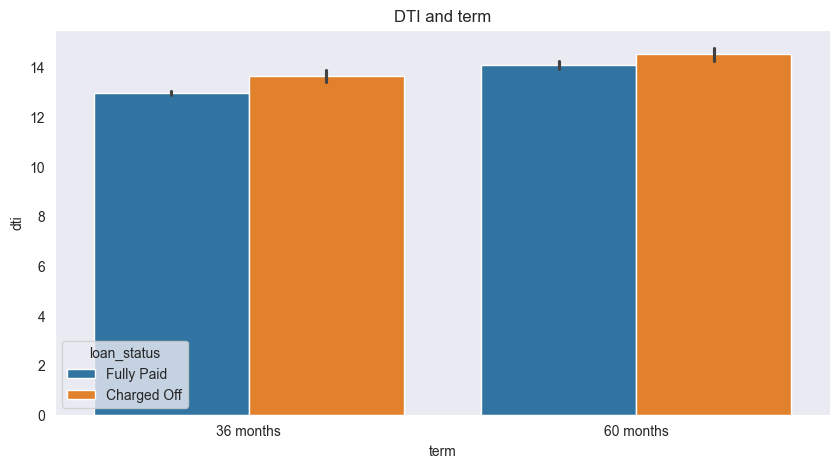

In [472]:
plt.figure(figsize=(10,5))
plt.title("DTI and term")
createSegmentedBarPlot('term','dti','loan_status',loan_data_df)

Borrwers with lower DTI fully paid loan vs borrowrs with high DTI seems to be defaulting in both the tenure. Here as well the difference between those group is not that huge and little tweak might help to increase the fully paid loan group.

So far we have observed the term impacts on the default rate. Let's anaylze the grade factor with respect to the defaulted loans.

In [473]:
loan_bivariate_grade_data = loan_data_df.groupby(['grade','loan_status'],as_index=False)['id'].count()
loan_bivariate_grade_data

,grade,loan_status,id
0,A,Charged Off,552
1,A,Fully Paid,8966
2,B,Charged Off,1326
3,B,Fully Paid,9823
4,C,Charged Off,1251
5,C,Fully Paid,6223
6,D,Charged Off,1049
7,D,Fully Paid,3803
8,E,Charged Off,686
9,E,Fully Paid,1888


In [474]:
sum_loan_bivariate_grade_data = loan_bivariate_grade_data.groupby('grade')['id'].transform('sum')
loan_bivariate_grade_data['percentage'] = loan_bivariate_grade_data['id'] / sum_loan_bivariate_grade_data * 100
loan_bivariate_grade_data

,grade,loan_status,id,percentage
0,A,Charged Off,552,5.799538
1,A,Fully Paid,8966,94.200462
2,B,Charged Off,1326,11.893443
3,B,Fully Paid,9823,88.106557
4,C,Charged Off,1251,16.738025
5,C,Fully Paid,6223,83.261975
6,D,Charged Off,1049,21.619951
7,D,Fully Paid,3803,78.380049
8,E,Charged Off,686,26.651127
9,E,Fully Paid,1888,73.348873


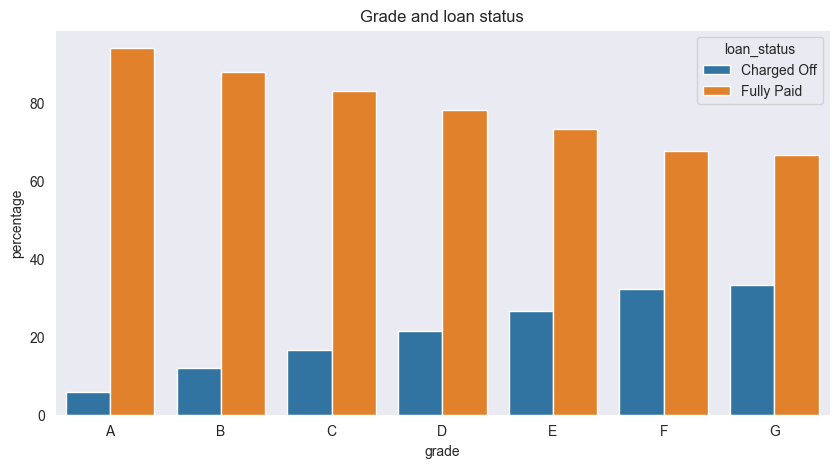

In [475]:
plt.figure(figsize=(10,5))
plt.title("Grade and loan status")
createSegmentedBarPlot('grade','percentage','loan_status',loan_bivariate_grade_data)

There is a visible pattern here. As grades are decreasing, defaulters numbers are also increasing. We can actually draw a line here and see and inclination. Like we observed this in the univariate analysis as well, grades really impacts the default rates.

***

#### 5. Let's analyze the impact of grade in the loan amount and see if there is any difference between default rates.

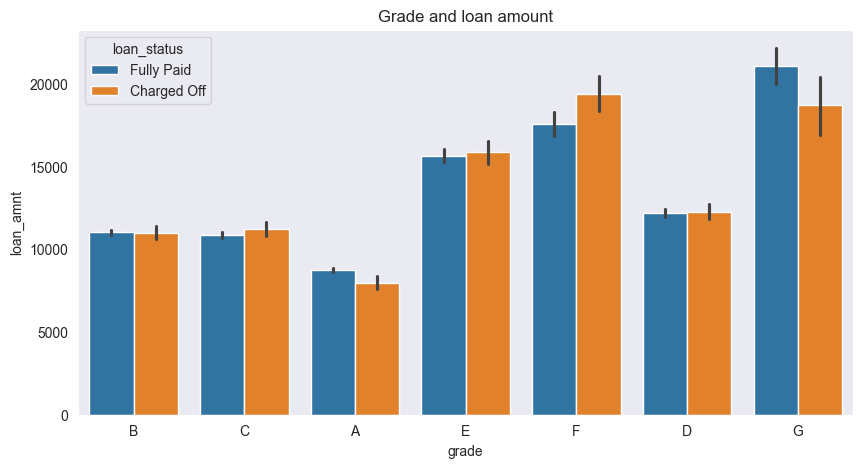

In [476]:
plt.figure(figsize=(10,5))
plt.title("Grade and loan amount")
createSegmentedBarPlot('grade','loan_amnt','loan_status',loan_data_df)

We already concluded that lower grade borrowers defaulted more than higher grades but also indicates that lower grades borrowers got more loan amount than higher grades.

This concludes that lenders club gives more loan amount to lower grades borrowers with high interest which in turns increases the default rate.

We can check this in the following graph as well.

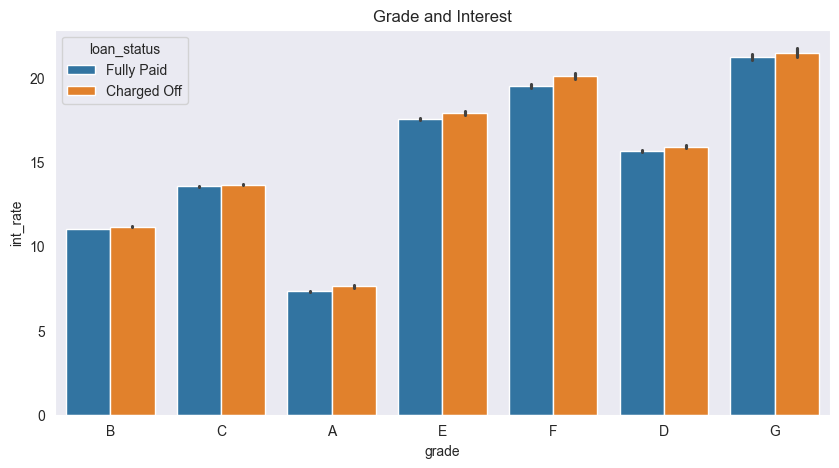

In [477]:
plt.figure(figsize=(10,5))
plt.title("Grade and Interest")
createSegmentedBarPlot('grade','int_rate','loan_status',loan_data_df)

Borrowers with grades E,F,and G seems to have more interest rates. Almost double than A and B. 

#### This concludes our thought stated above, combination of lower grades, more loan amount and higher interest rates cause chances of getting default. 

***

#### 6. Let's analyze if verification status of a borrowers impact default rates.

In [478]:
loan_bivariate_verification_data = loan_data_df.groupby(['verification_status','loan_status'],as_index=False)['id'].count()
loan_bivariate_verification_data

,verification_status,loan_status,id
0,Not Verified,Charged Off,1924
1,Not Verified,Fully Paid,13630
2,Source Verified,Charged Off,1393
3,Source Verified,Fully Paid,8090
4,Verified,Charged Off,1949
5,Verified,Fully Paid,9814


In [479]:
sum_loan_bivariate_verification_data = loan_bivariate_verification_data.groupby('verification_status')['id'].transform('sum')
loan_bivariate_verification_data['percentage'] = loan_bivariate_verification_data['id'] / sum_loan_bivariate_verification_data * 100
loan_bivariate_verification_data

,verification_status,loan_status,id,percentage
0,Not Verified,Charged Off,1924,12.369808
1,Not Verified,Fully Paid,13630,87.630192
2,Source Verified,Charged Off,1393,14.689444
3,Source Verified,Fully Paid,8090,85.310556
4,Verified,Charged Off,1949,16.568902
5,Verified,Fully Paid,9814,83.431098


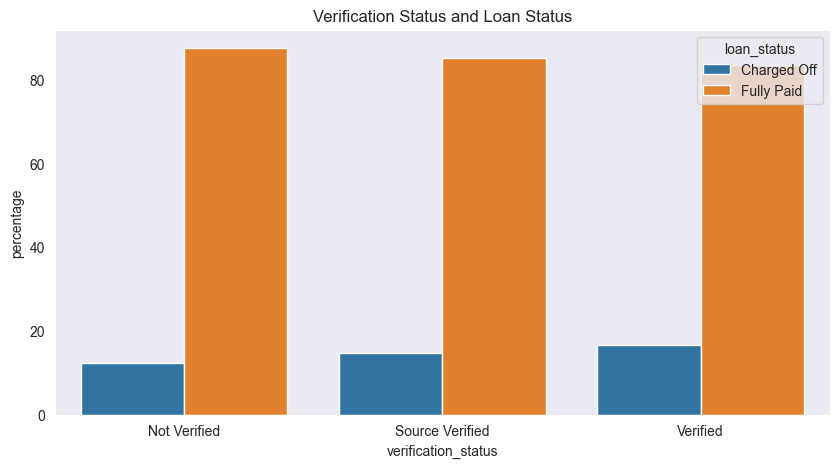

In [480]:
plt.figure(figsize=(10,5))
plt.title("Verification Status and Loan Status")
createSegmentedBarPlot('verification_status','percentage','loan_status',loan_bivariate_verification_data)

The default rates not seem to be impacted by the verification status of a borrower.

***

#### 7. Let's also figure out if the purpose for which loan is taken impacts the default rate.

In [481]:
loan_bivariate_purpose_data = loan_data_df.groupby(['purpose','loan_status'],as_index=False)['id'].count()
loan_bivariate_purpose_data

,purpose,loan_status,id
0,car,Charged Off,151
1,car,Fully Paid,1278
2,credit_card,Charged Off,501
3,credit_card,Fully Paid,4298
4,debt_consolidation,Charged Off,2623
5,debt_consolidation,Fully Paid,14750
6,educational,Charged Off,49
7,educational,Fully Paid,247
8,home_improvement,Charged Off,319
9,home_improvement,Fully Paid,2415


In [482]:
sum_loan_bivariate_purpose_data = loan_bivariate_purpose_data.groupby('purpose')['id'].transform('sum')
loan_bivariate_purpose_data['percentage'] = loan_bivariate_purpose_data['id'] / sum_loan_bivariate_purpose_data * 100
loan_bivariate_purpose_data

,purpose,loan_status,id,percentage
0,car,Charged Off,151,10.566830
1,car,Fully Paid,1278,89.433170
2,credit_card,Charged Off,501,10.439675
3,credit_card,Fully Paid,4298,89.560325
4,debt_consolidation,Charged Off,2623,15.098141
5,debt_consolidation,Fully Paid,14750,84.901859
6,educational,Charged Off,49,16.554054
7,educational,Fully Paid,247,83.445946
8,home_improvement,Charged Off,319,11.667886
9,home_improvement,Fully Paid,2415,88.332114


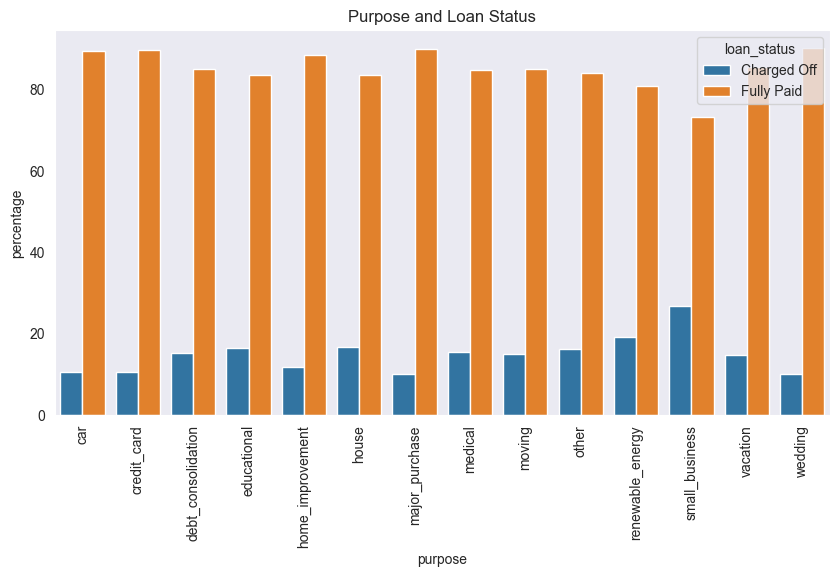

In [483]:
plt.figure(figsize=(10,5))
plt.title("Purpose and Loan Status")
plt.xticks(rotation=90)
createSegmentedBarPlot('purpose','percentage','loan_status',loan_bivariate_purpose_data)

Borrowers with purpose for small business seems to be defaulted more than other category.

***

#### 8. Let's see if the loan amount also impacts the default rate with the purpose.

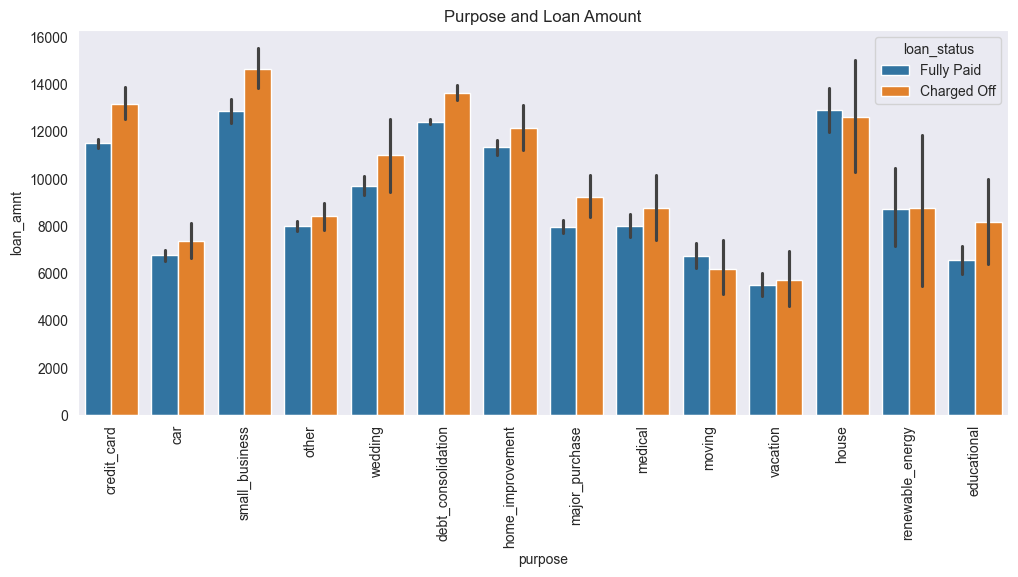

In [484]:
plt.figure(figsize=(12,5))
plt.title("Purpose and Loan Amount")
plt.xticks(rotation=90)
createSegmentedBarPlot('purpose','loan_amnt','loan_status',loan_data_df)

Borrowrs with small business who are defaulted have taken more loan amount than other categories. 

This again concludes our though that higher loan amount coupled with higher interest rates results in more default.

***

#### 9. Let's reverify our thought process by plotting loan amount and interest rates with the loan status.

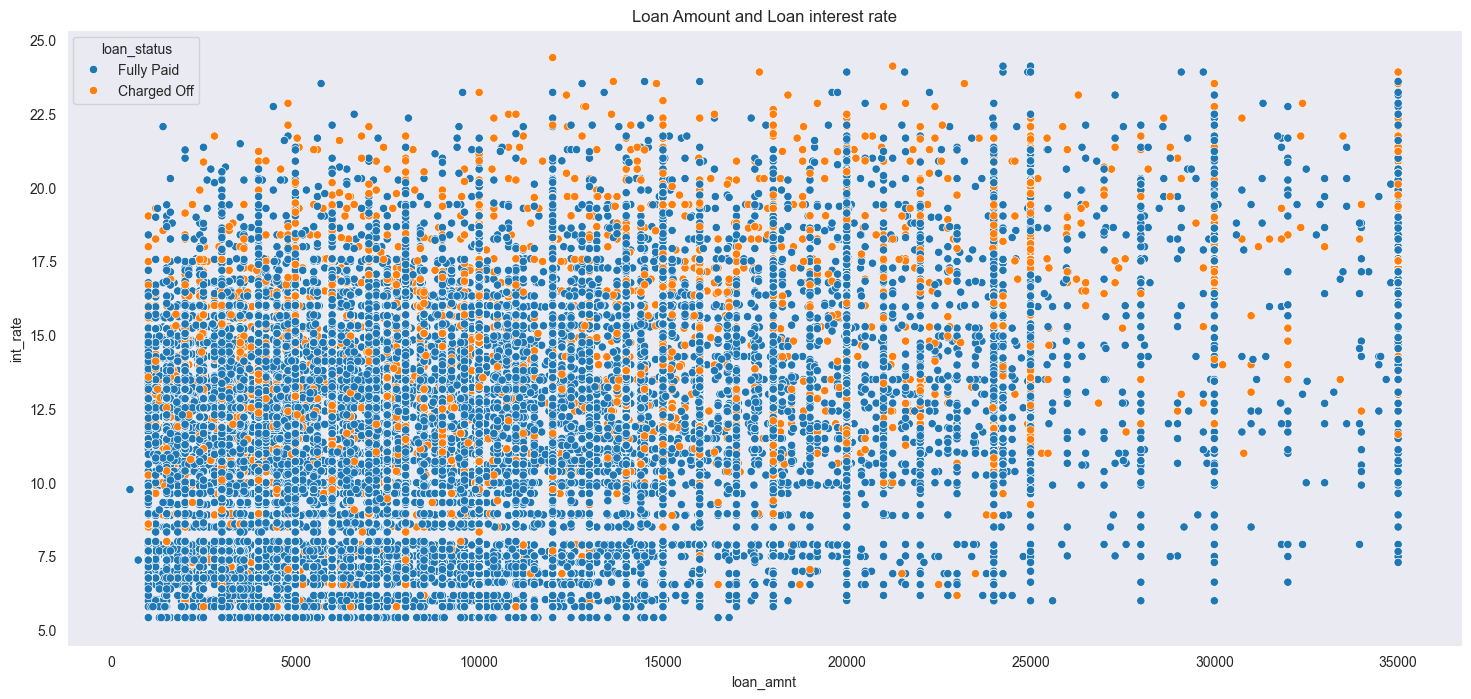

In [485]:
plt.figure(figsize=(18,8))
sns.scatterplot(x='loan_amnt', y='int_rate', data=loan_data_df, hue='loan_status')
plt.title('Loan Amount and Loan interest rate')
plt.show()

Looking at the chart, it's clear that when the loan amount is higher on the x-axis and the interest rate is also high, we definitely see more loans that weren't paid back. However, there are some defaults even with lower loan amounts and lower interest rates, but they're not as common as the ones with higher interest rates.

### Now let's plot a correlation matrix and try to find some insights.

In [486]:
loan_data_df.head()

,id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,last_pymnt_amnt,pub_rec_bankruptcies,issue_d_year,issue_d_month,issue_d_dayofweek,earliest_cr_year,earliest_cr_month,earliest_cr_dayofweek,approved_loan_amnt_percentage
0,1077501,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,1985-01-01,1,3,0,13648,83.7,9,5863.155187,171.62,0.0,2011,12,3,1985,1,1,99.5
1,1077430,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,1999-04-01,5,3,0,1687,9.4,4,1008.710000,119.66,0.0,2011,12,3,1999,4,3,100.0
2,1077175,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,2001-11-01,2,2,0,2956,98.5,10,3005.666844,649.91,0.0,2011,12,3,2001,11,3,100.0
3,1076863,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,12231.890000,357.48,0.0,2011,12,3,1996,2,3,100.0
5,1075269,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0,2004-11-01,3,9,0,7963,28.3,12,5632.210000,161.03,0.0,2011,12,3,2004,11,0,100.0


In [487]:
loan_data_df.dtypes

id                                        int64
loan_amnt                                 int64
funded_amnt_inv                         float64
term                                     object
int_rate                                float64
installment                             float64
grade                                    object
sub_grade                                object
emp_length                               object
home_ownership                           object
annual_inc                              float64
verification_status                      object
issue_d                          datetime64[ns]
loan_status                              object
purpose                                  object
addr_state                               object
dti                                     float64
delinq_2yrs                               int64
earliest_cr_line                 datetime64[ns]
inq_last_6mths                            int64
open_acc                                

In [488]:
numeric_columns = loan_data_df.select_dtypes(include=['number'])
correlation_data = numeric_columns.corr()

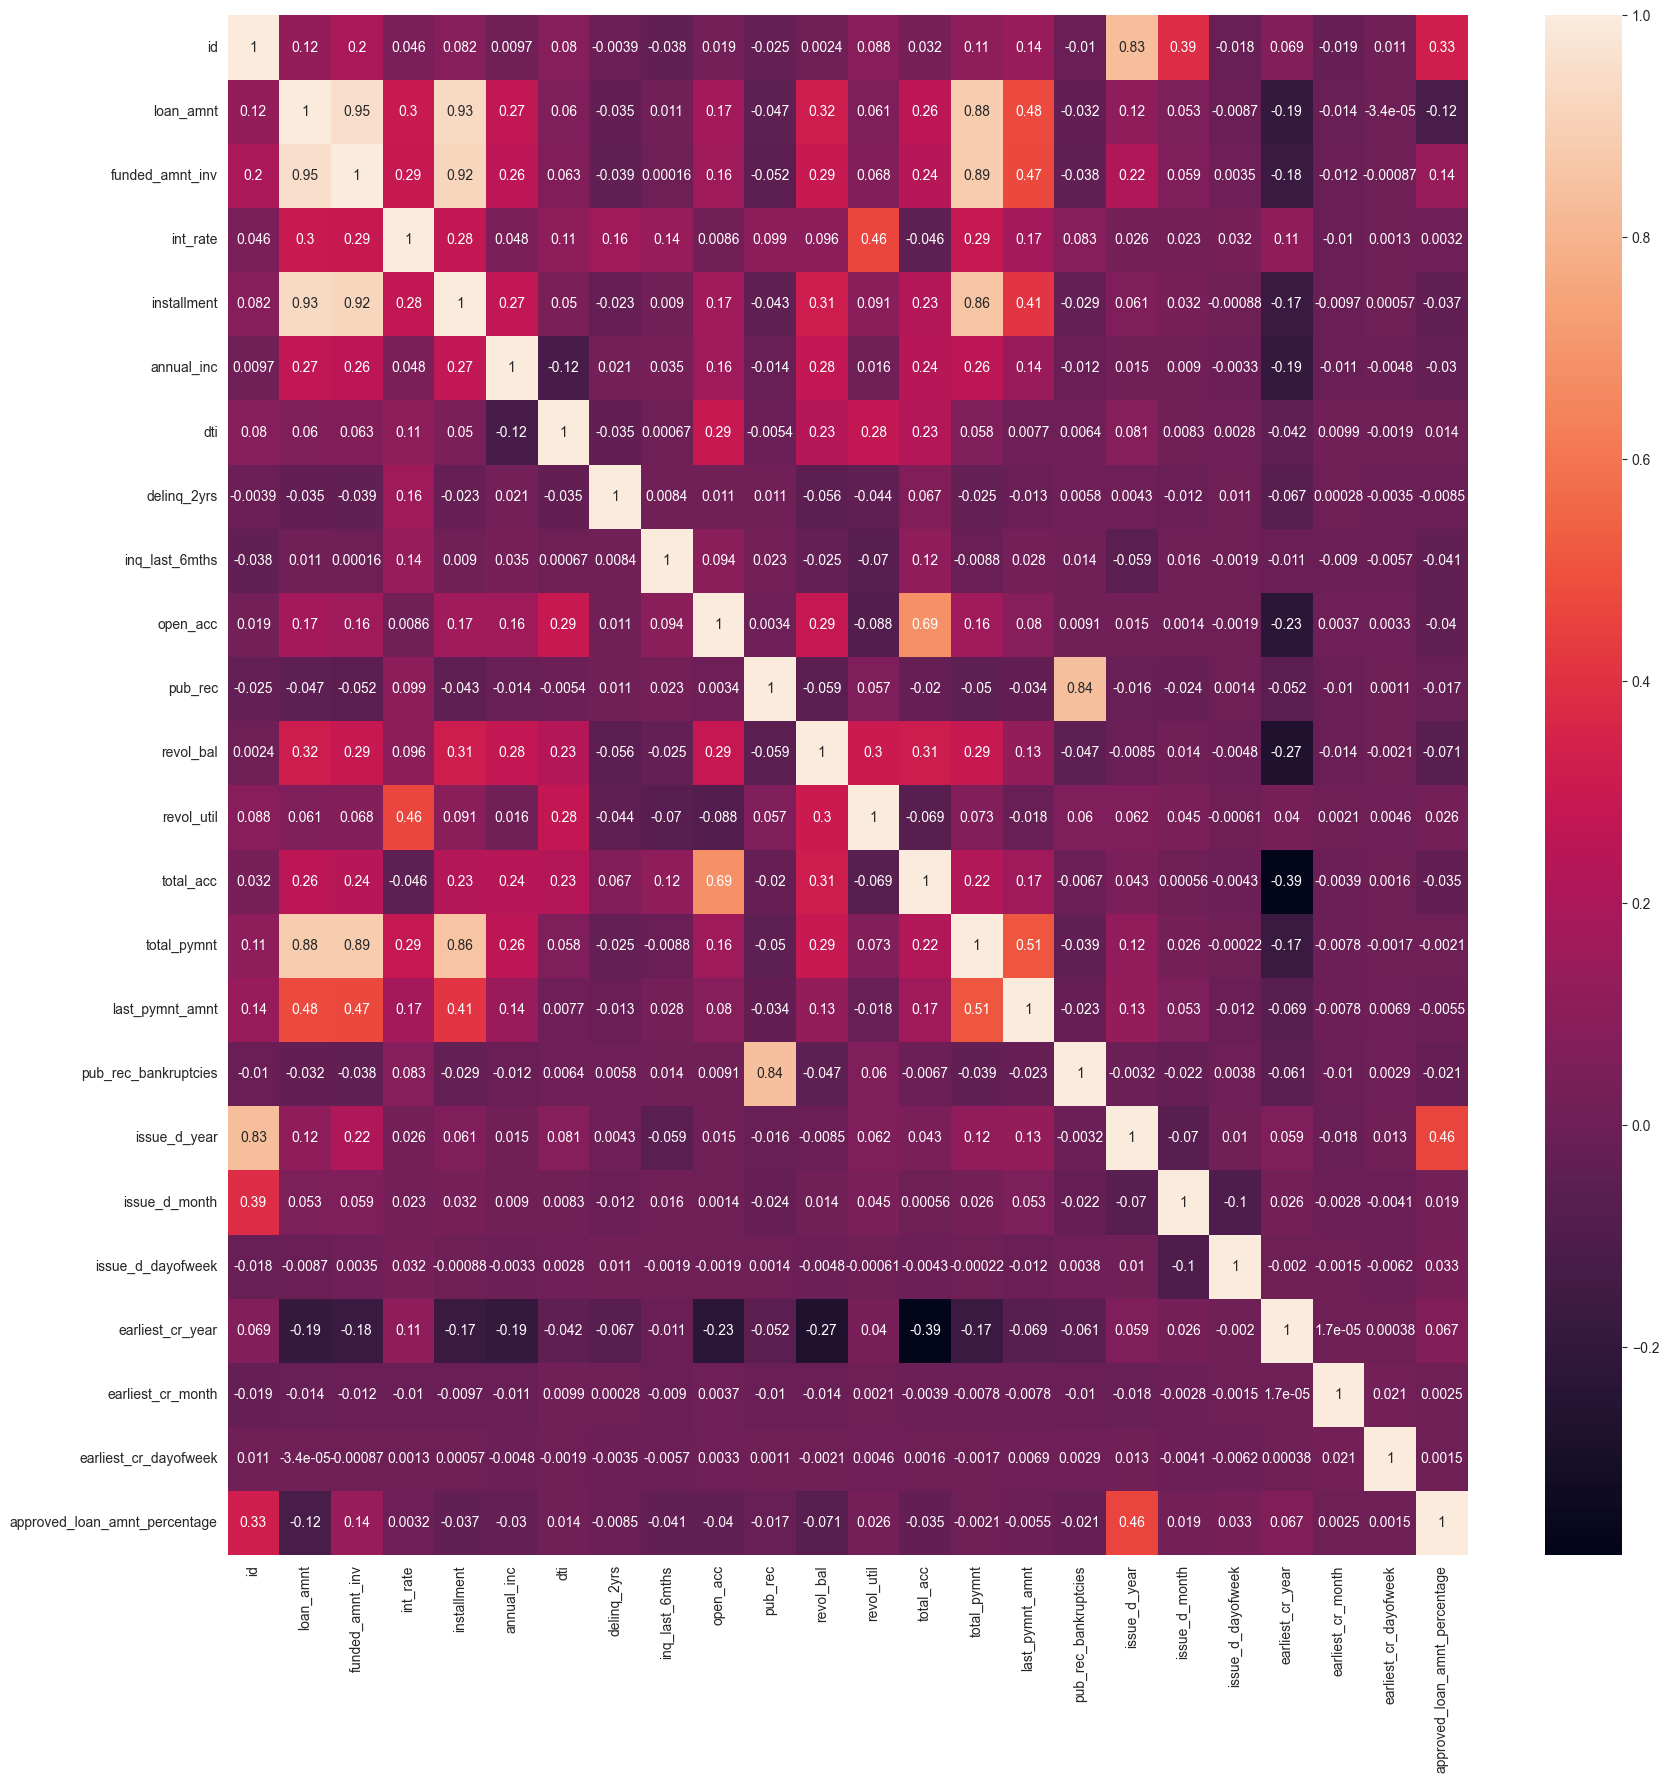

In [489]:
plt.figure(figsize=(20,20))
corr_matrix = sns.heatmap(correlation_data,annot=True)
plt.show()

Public derogatory record and public bankrupcies are highly co-related.

## <font color=yellow> Conclusion </font> 

The key factors that can lead to loan defaults include:

- Interest rate: If the interest rate is higher, there is a greater chance of default.
- Grade: If the grade is lower, there is a higher chance of default.
- Loan Amount: Larger loan amounts are more likely to result in default.
- Term: A 60-month loan term carries a higher risk of default.
- Annual Income: Lower annual income increases the risk of default.
- Debt to income ratio: A higher DTI ratio raises the risk of default.
- Public Bankruptcies Record: Having a greater number of public bankruptcy records increases the chance of default.
- Purpose: Small business owners face a higher risk of default.

Public Bankrupties record has been a significant factor in borrowers experiencing defaults. In some cases, borrowers with the lowest interest rates have still defaulted if they had a high number of bankruptcies on their record. Therefore, it's crucial for Lending Club to consistently assess this record, regardless of the loan amount and interest rates.